In [110]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob 

['cluster_mode_res/sci-fi_thriller.csv',
 'cluster_mode_res/action_comedy.csv',
 'cluster_mode_res/comedy_drama.csv',
 'cluster_mode_res/sci-fi_comedy.csv']

In [117]:
file_list = glob.glob("cluster_mode_res/*")
df = pd.read_csv(file_list[0],index_col=0)
df['total_cluster'] = df['cluster_number'].apply(lambda x : x.split(',')[-1] if pd.notnull(x) else x)
df

is_baseline cluster_mode  seed cluster_number  test_Y_MRR  test_Y_NDCG_5  \
0        False     separate     3      50,50,100    0.033979       0.023144   
0        False     separate     3    100,100,200    0.034367       0.022173   
0        False     separate     3    150,150,300    0.037833       0.027034   
0        False     separate     3    200,200,400    0.040189       0.029611   
0        False     separate     3    250,250,500    0.041573       0.031061   
0        False     separate     3    300,300,600    0.037866       0.028556   
0        False     separate     3    350,350,700    0.042357       0.032528   
0        False     separate     3    400,400,800    0.030535       0.017299   
0        False     separate     3    450,450,800    0.035942       0.026339   
0        False     separate     3   500,500,1000    0.036962       0.026514   
0        False        joint     3      50,50,100    0.031403       0.019359   
0        False        joint     3    100,100,200    0.038288       0.028955   
0        False        joint     3    150,150,300    0.048238       0.037435   
0        False        joint     3    200,200,400    0.035071       0.023674   
0        False        joint     3    250,250,500    0.040190       0.031353   
0        False        joint     3    300,300,600    0.032115       0.020264   
0        False        joint     3    350,350,700    0.039595       0.029249   
0        False        joint     3    400,400,800    0.035868       0.023758   
0        False        joint     3    450,450,800    0.035868       0.023758   
0        False        joint     3   500,500,1000    0.034059       0.023264   
0         True          NaN     3            NaN    0.052701       0.040088   

   test_Y_NDCG_10  test_Y_HR_5  test_Y_HR_10  test_Y_MRR_male  \
0        0.029255     0.048837      0.076744         0.033265   
0        0.031491     0.046512      0.090698         0.035698   
0        0.036361     0.059302      0.103488         0.039202   
0        0.034137     0.056977      0.077907         0.043406   
0        0.038521     0.062791      0.097674         0.042216   
0        0.034637     0.061628      0.089535         0.035735   
0        0.042336     0.068605      0.113953         0.044263   
0        0.029809     0.038372      0.096512         0.031890   
0        0.033307     0.056977      0.090698         0.035842   
0        0.033334     0.053488      0.086047         0.035884   
0        0.028369     0.041860      0.084884         0.031142   
0        0.035584     0.061628      0.093023         0.037105   
0        0.043862     0.070930      0.101163         0.045039   
0        0.031472     0.051163      0.086047         0.033948   
0        0.038531     0.070930      0.104651         0.038901   
0        0.029516     0.044186      0.087209         0.033253   
0        0.037915     0.062791      0.103488         0.040054   
0        0.033209     0.050000      0.094186         0.036551   
0        0.033209     0.050000      0.094186         0.036551   
0        0.033561     0.054651      0.103488         0.033984   
0        0.049095     0.079070      0.120930         0.053570   

   test_Y_NDCG_5_male  test_Y_NDCG_10_male  test_Y_HR_5_male  \
0            0.022176             0.028839          0.048012   
0            0.022661             0.032999          0.045102   
0            0.027499             0.038501          0.059651   
0            0.032608             0.037257          0.061106   
0            0.031833             0.038994          0.065470   
0            0.025663             0.032314          0.056741   
0            0.034137             0.043545          0.071290   
0            0.018495             0.031047          0.040737   
0            0.025950             0.033459          0.056741   
0            0.024988             0.030503          0.049467   
0            0.018877             0.027995          0.040737   
0            0.027967             0.034431          0.061106   
0

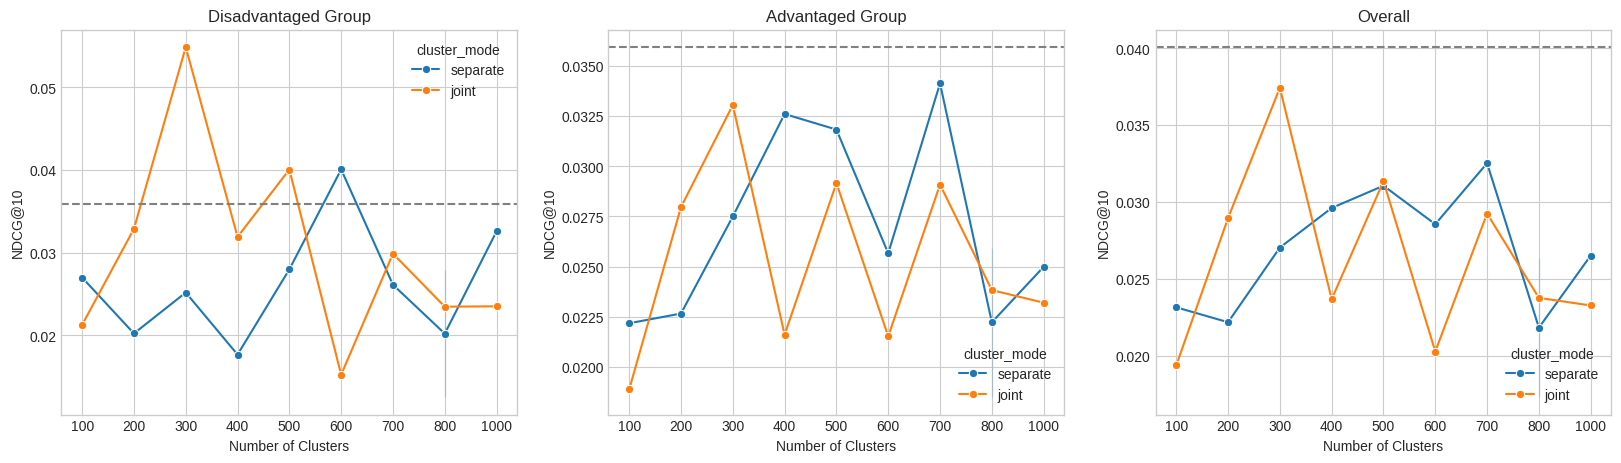

In [136]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
seed = 3
metric = 'test_Y_NDCG_5'
sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}_female", hue="cluster_mode",marker='o',ax=axes[0])              
axes[0].set_title('Disadvantaged Group')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('NDCG@10')
axes[0].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_female"].values[0], color='gray', linestyle='--')
sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}_male", hue="cluster_mode",marker='o',ax=axes[1])   

axes[1].set_title('Advantaged Group')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('NDCG@10')
axes[1].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_female"].values[0], color='gray', linestyle='--')

sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}", hue="cluster_mode",marker='o',ax=axes[2])              
axes[2].set_title('Overall')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('NDCG@10')
axes[2].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}"].values[0], color='gray', linestyle='--')

In [45]:
# df[["test_Y_MRR_UGF","test_Y_NDCG_5_UGF","test_Y_NDCG_10_UGF"]]  = df[["test_Y_MRR_male","test_Y_NDCG_5_male","test_Y_NDCG_10_male"]] - df[["test_Y_MRR_female","test_Y_NDCG_5_female","test_Y_NDCG_10_female"]]
df_new = df[["test_Y_MRR_male","test_Y_NDCG_5_male","test_Y_NDCG_10_male"]].subtract(df[["test_Y_MRR_female","test_Y_NDCG_5_female","test_Y_NDCG_10_female"]].values)

# Rename the new columns appropriately
df_new.columns = ['A_minus_D', 'B_minus_E', 'C_minus_F']
df[["test_Y_MRR_UGF","test_Y_NDCG_5_UGF","test_Y_NDCG_10_UGF"]] = df_new

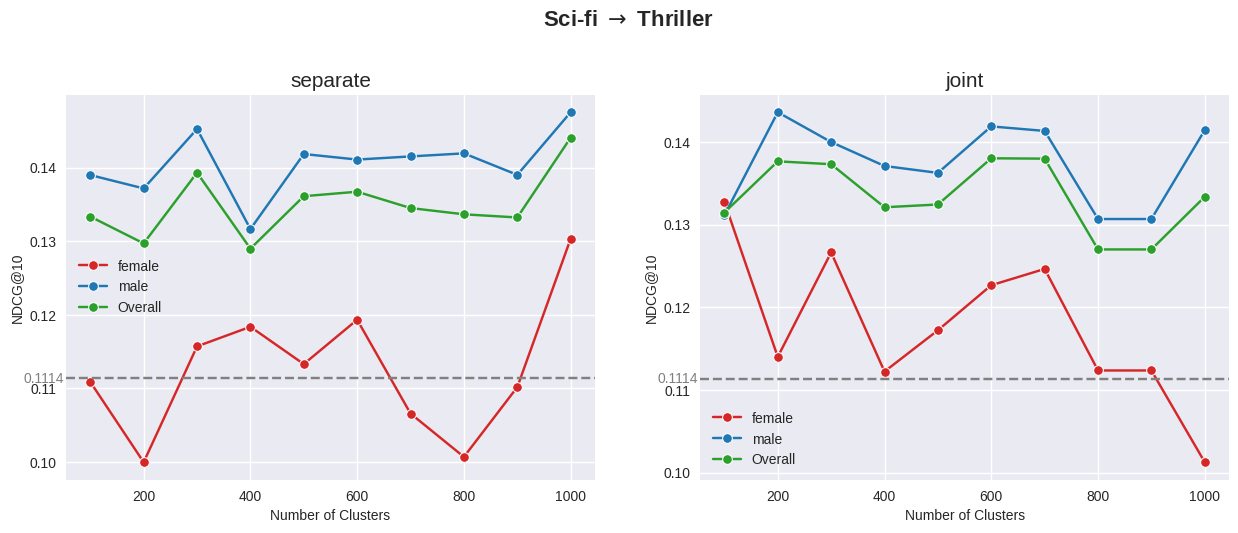

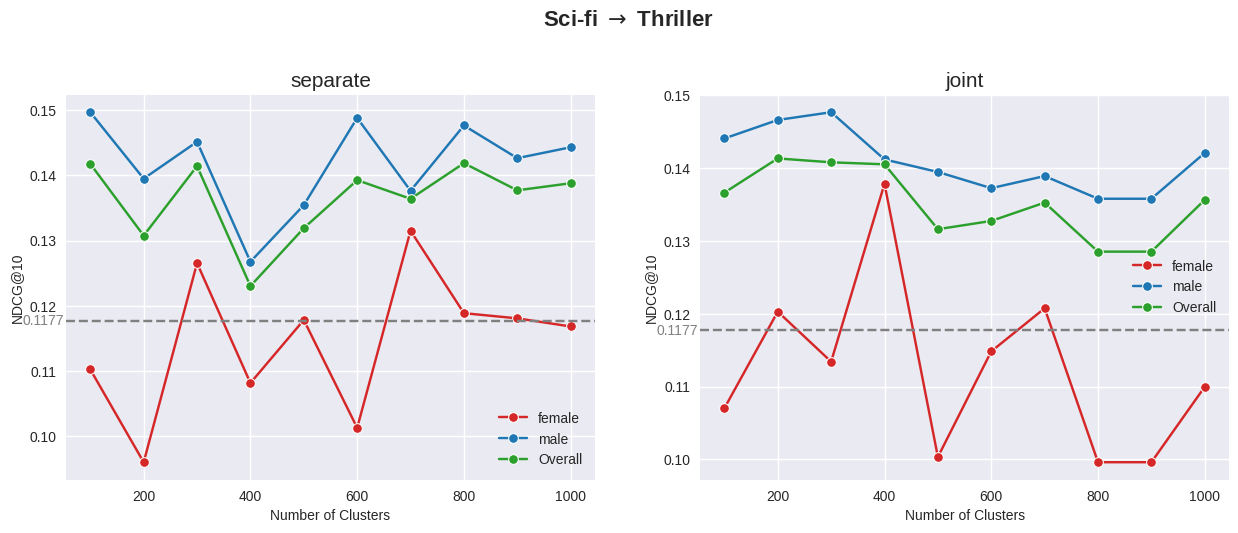

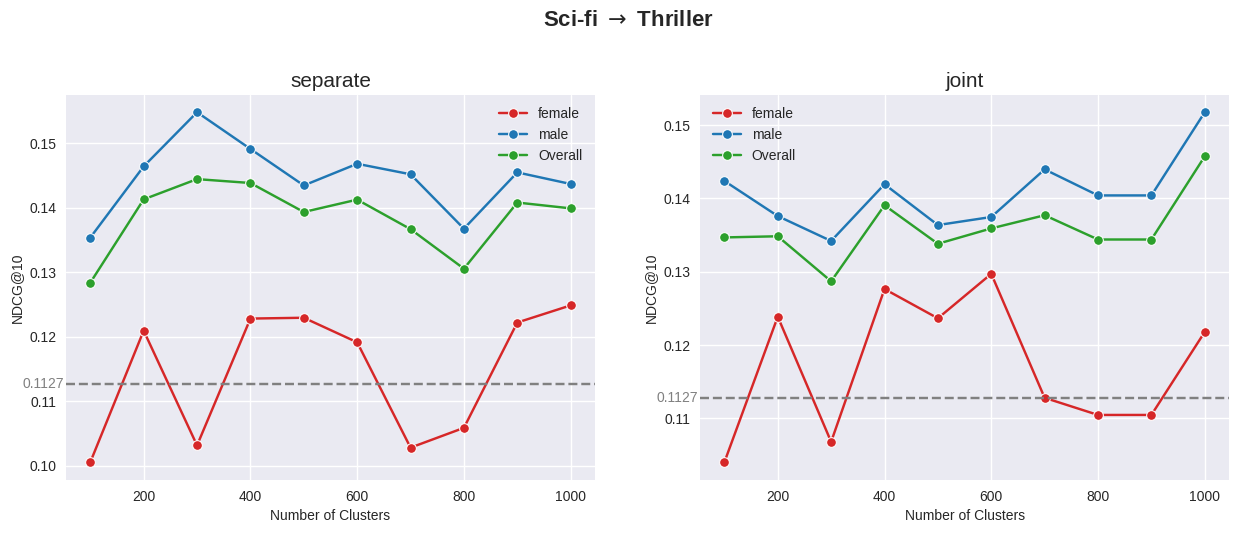

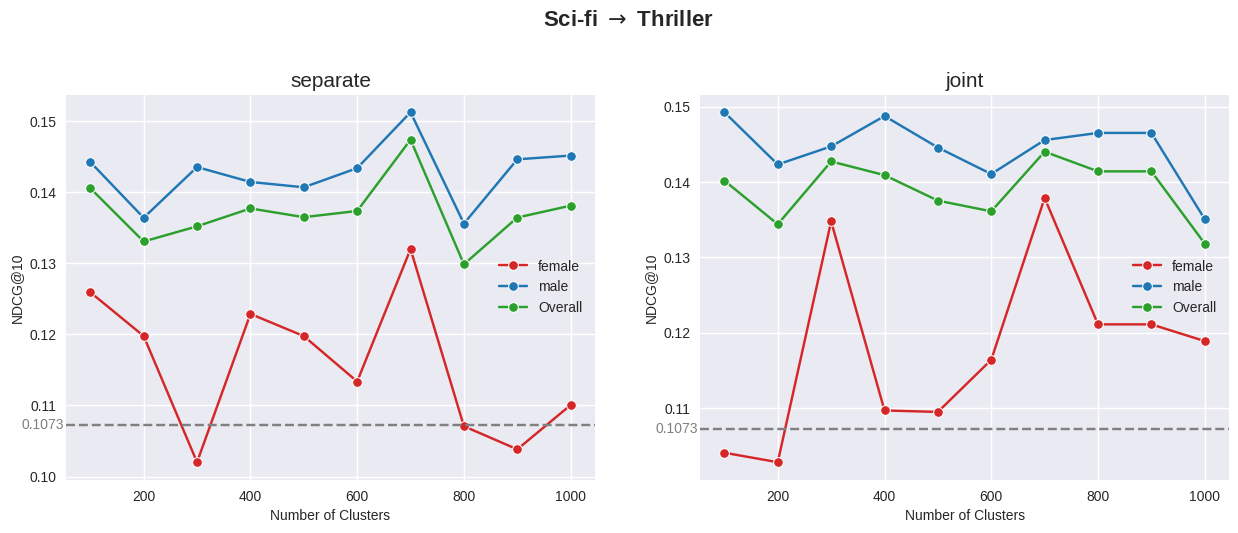

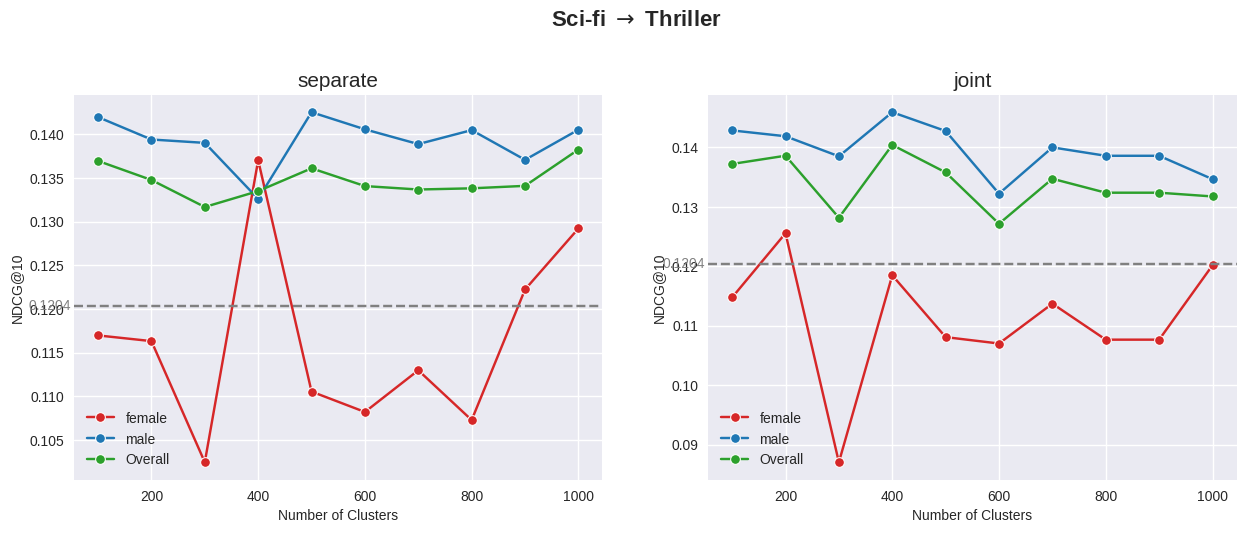

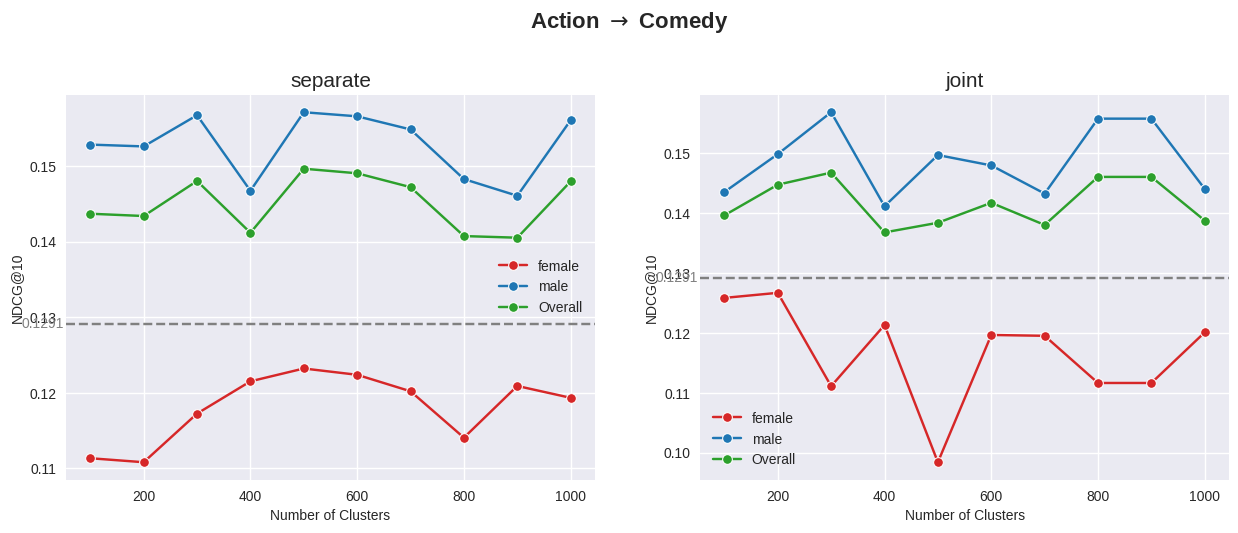

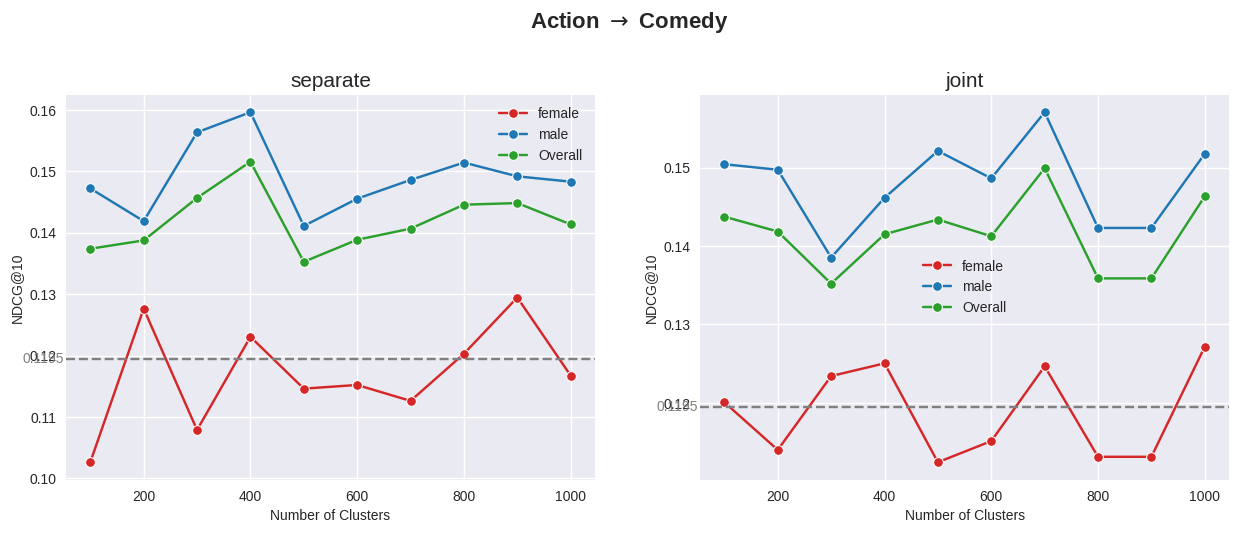

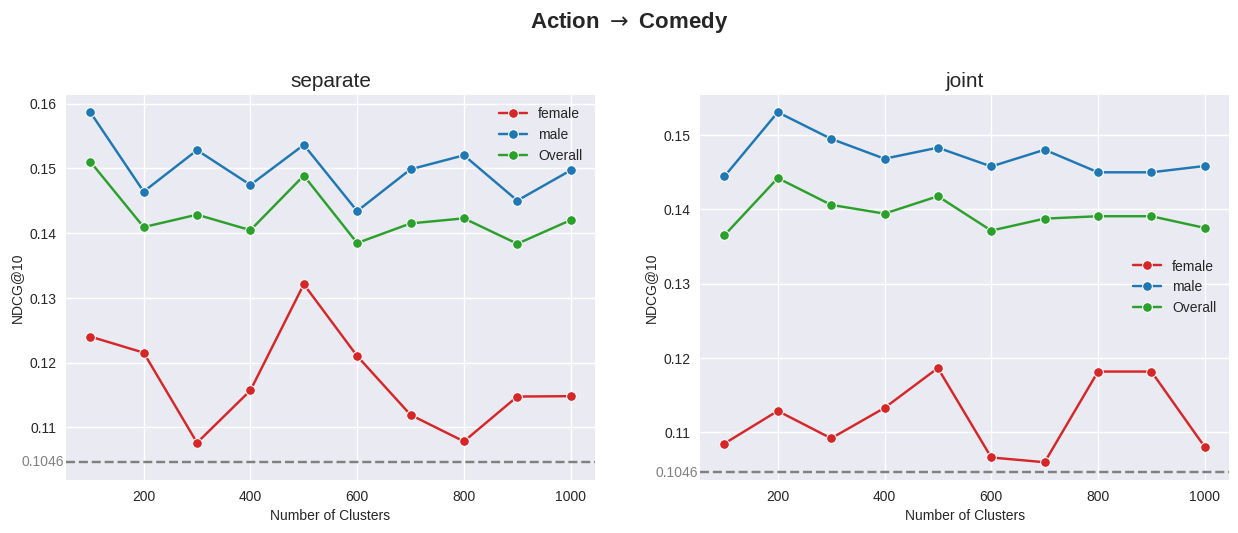

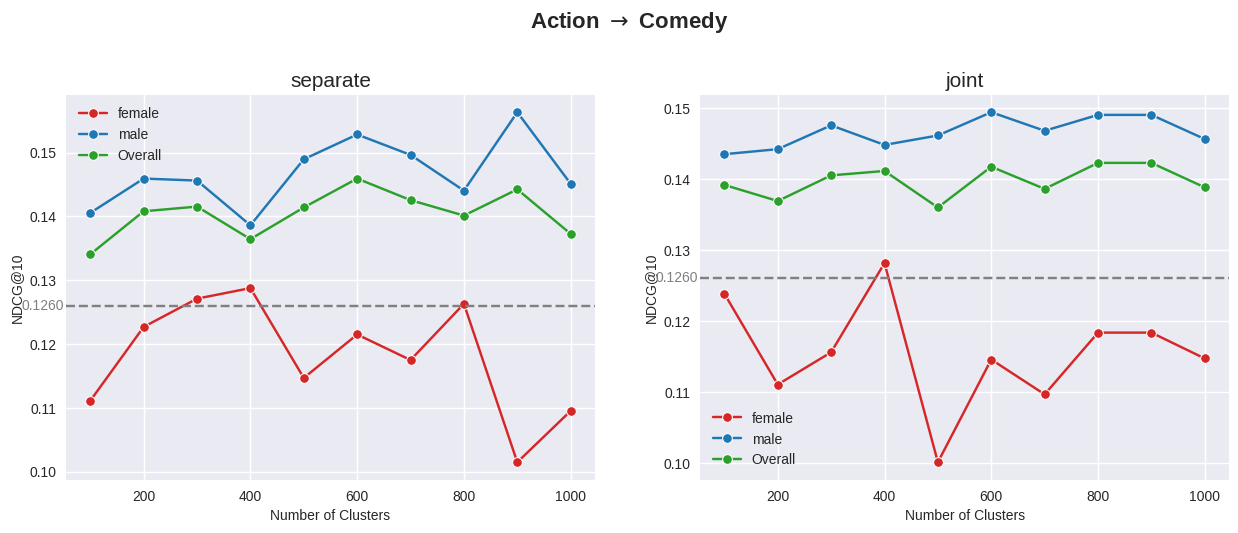

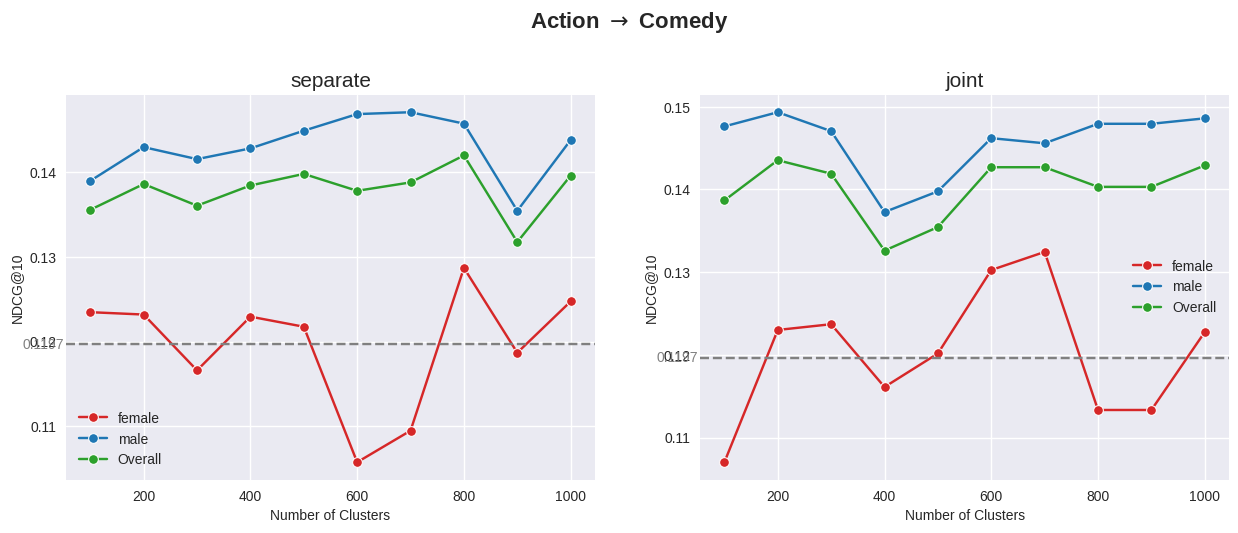

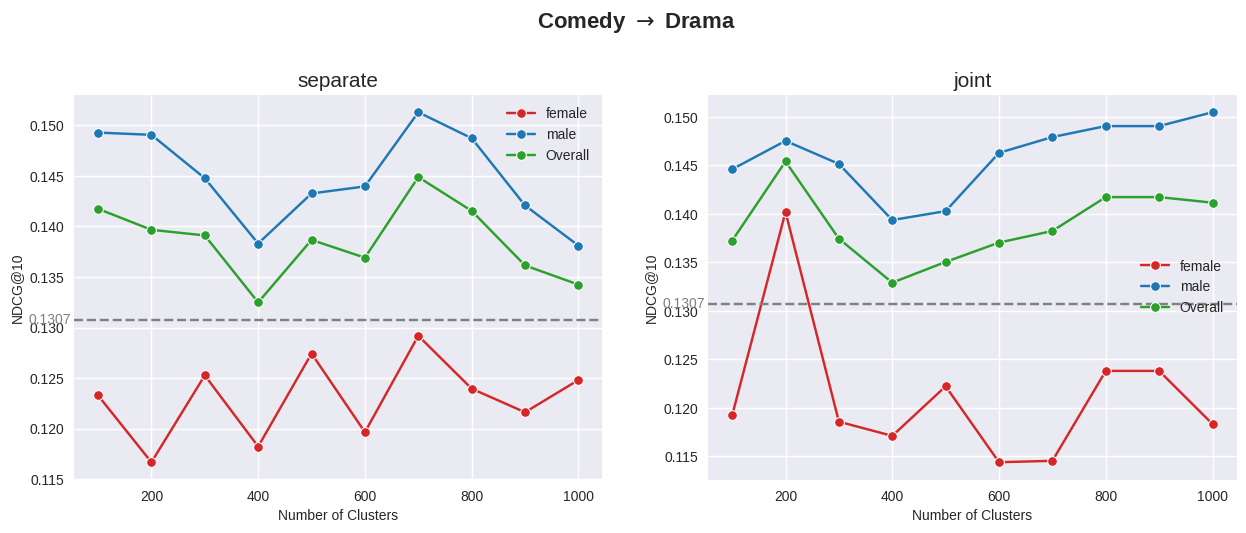

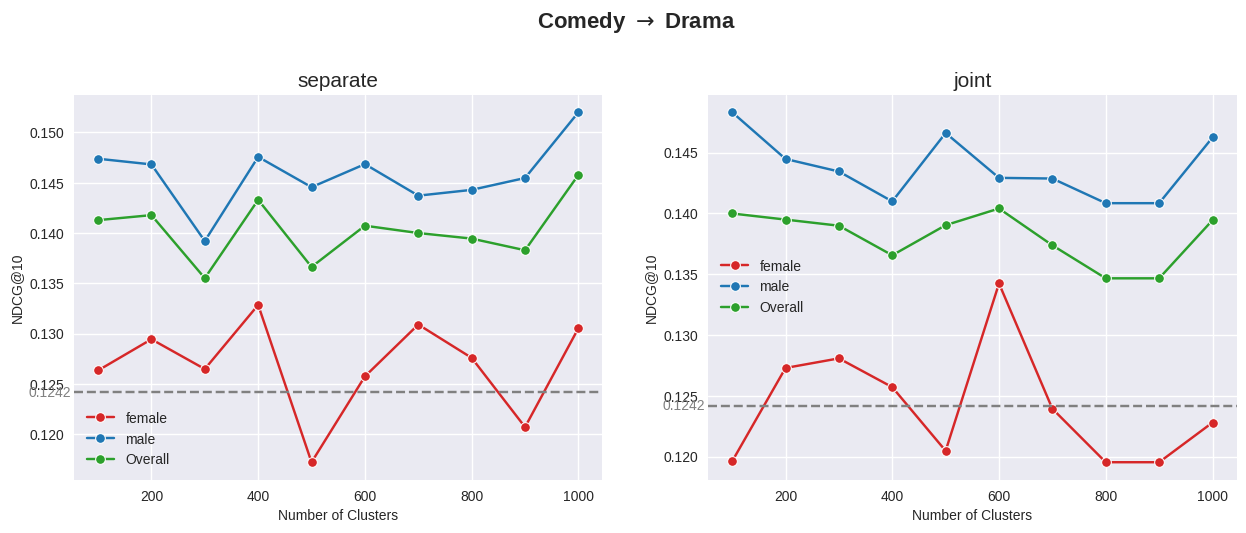

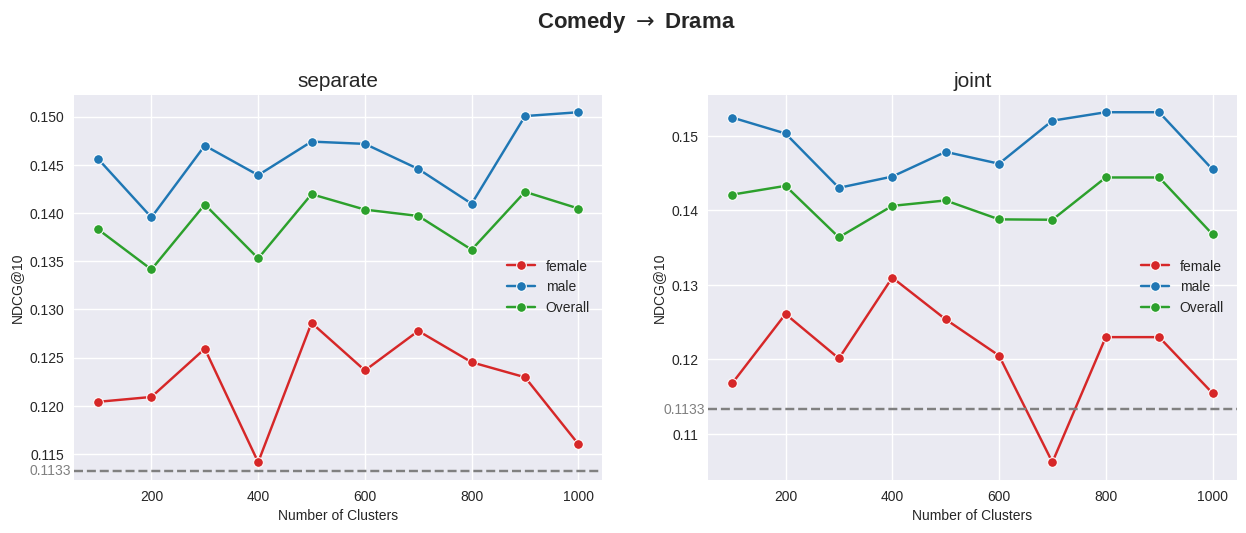

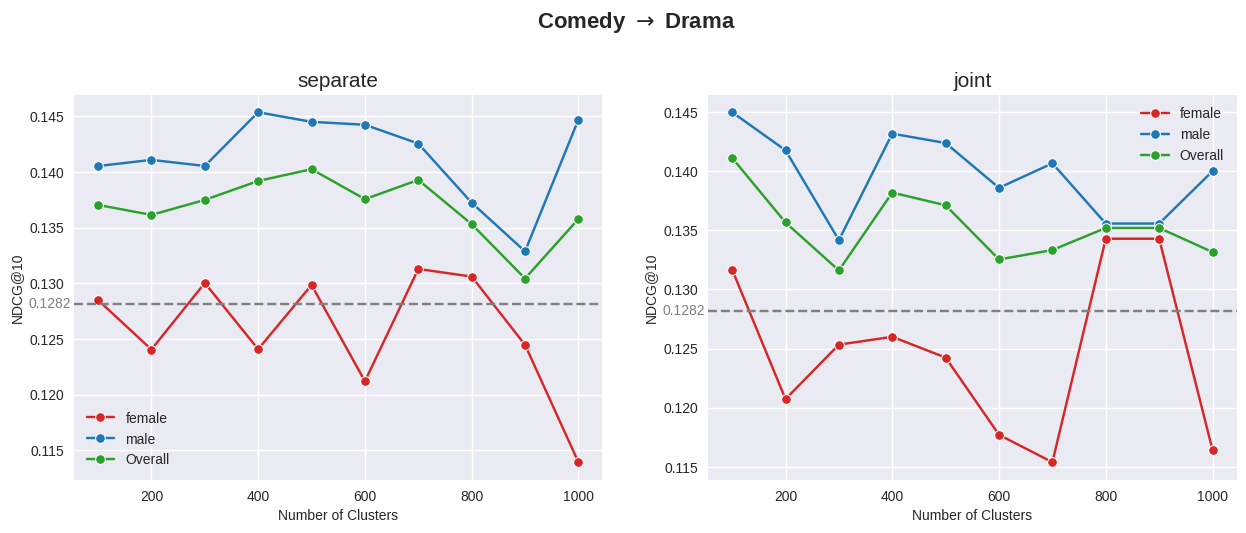

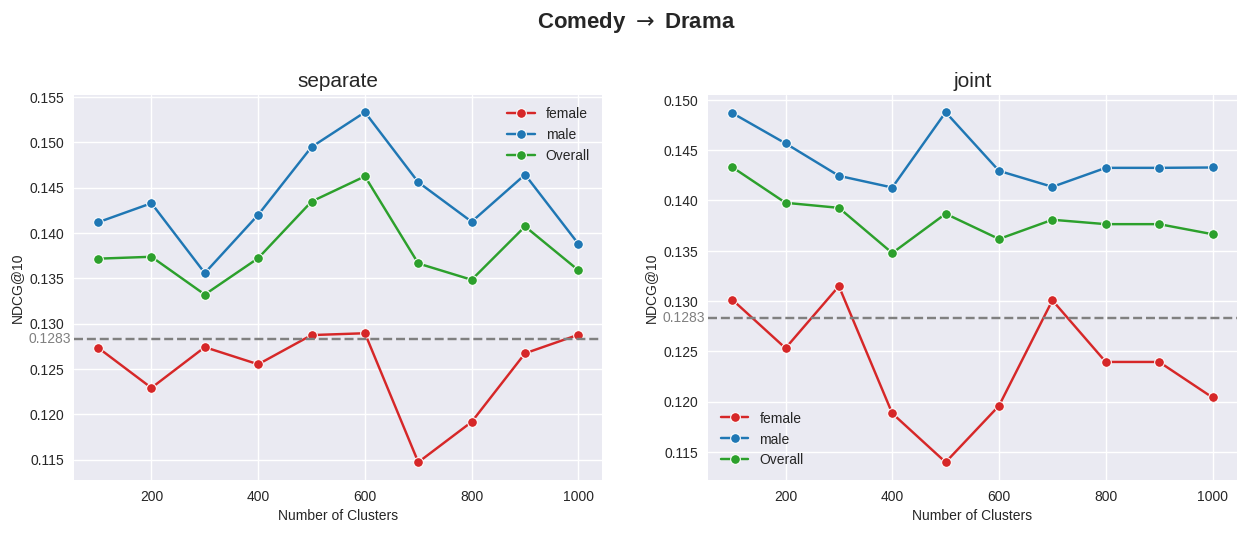

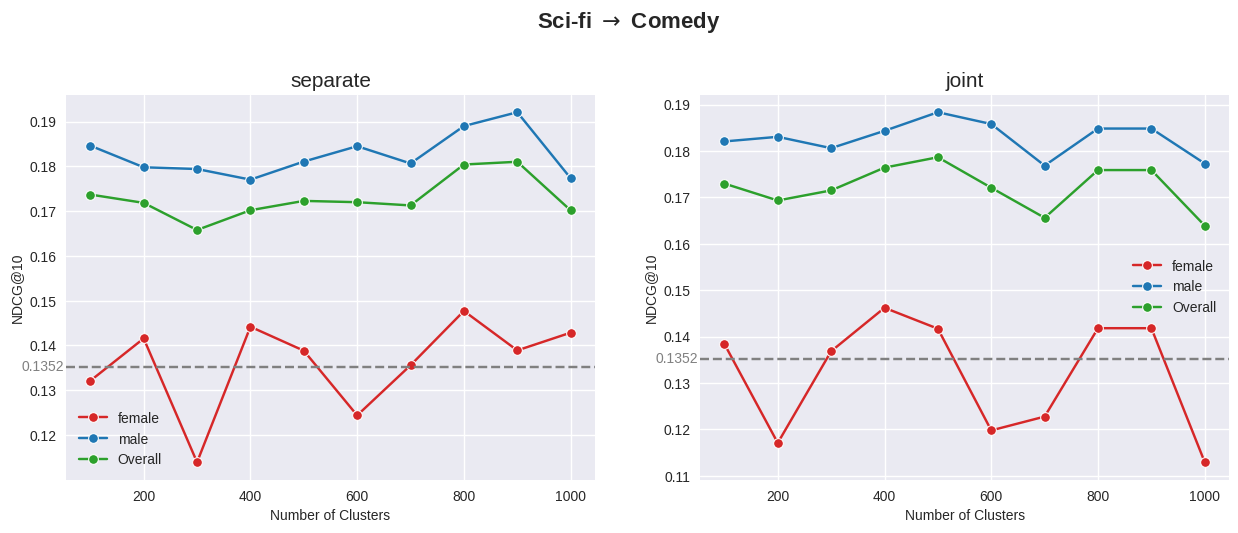

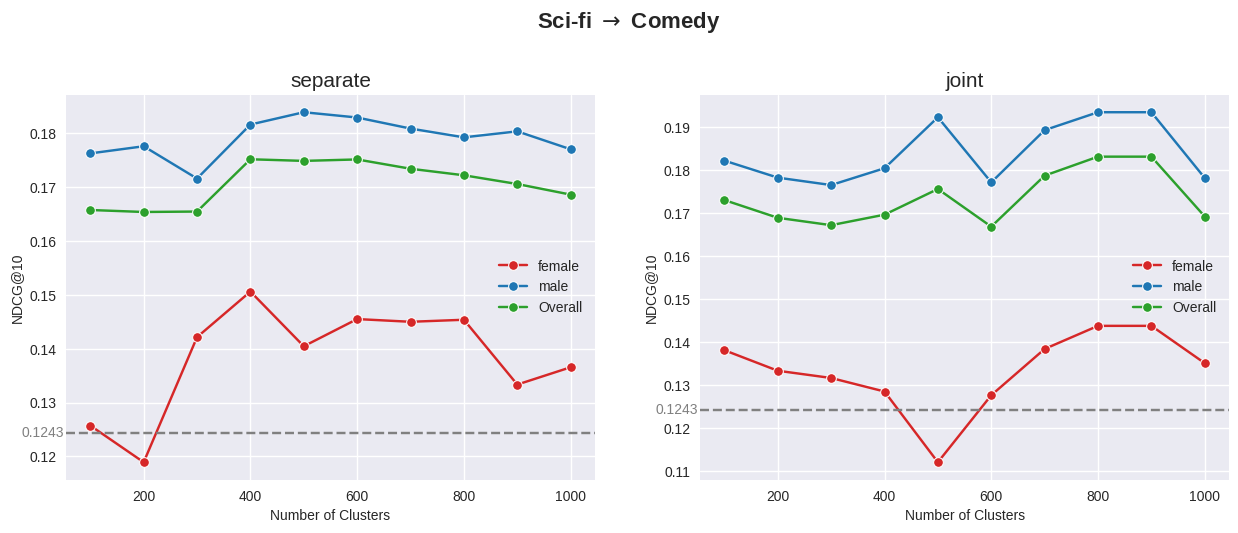

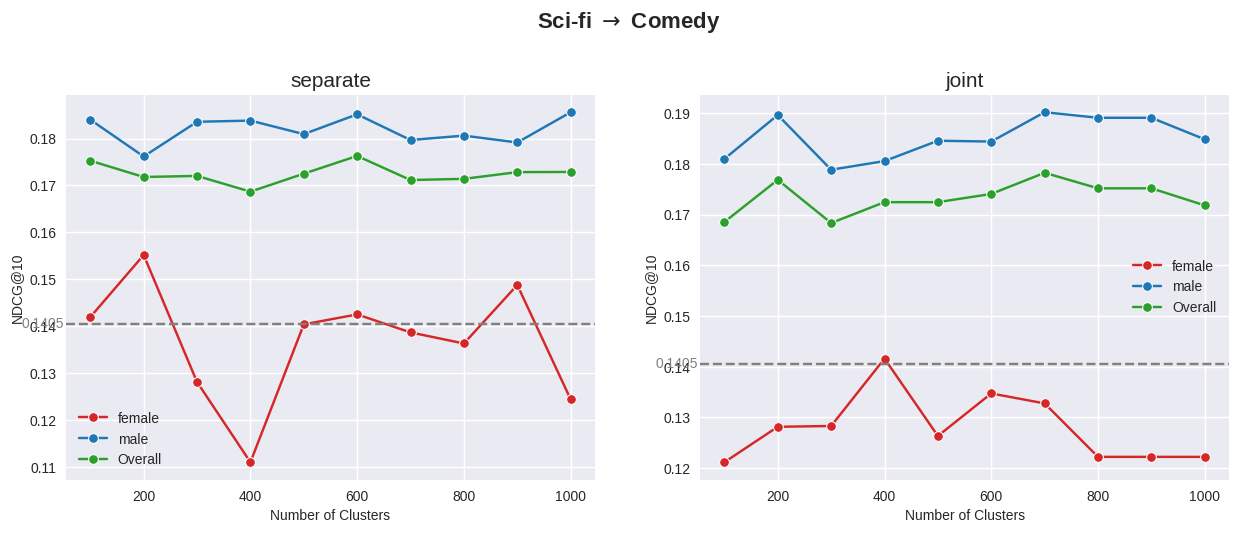

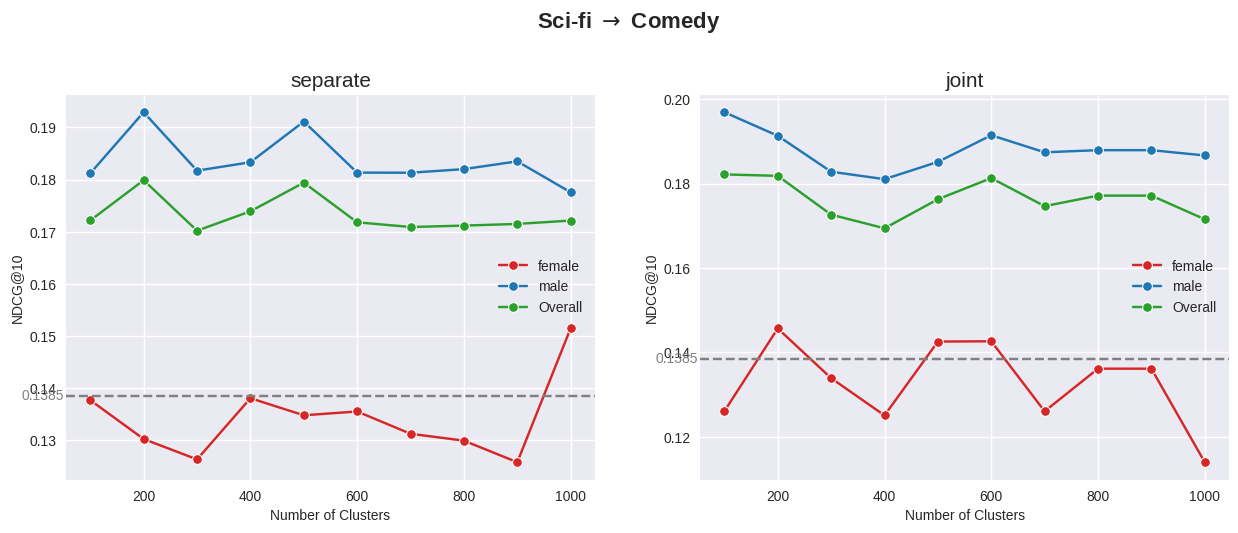

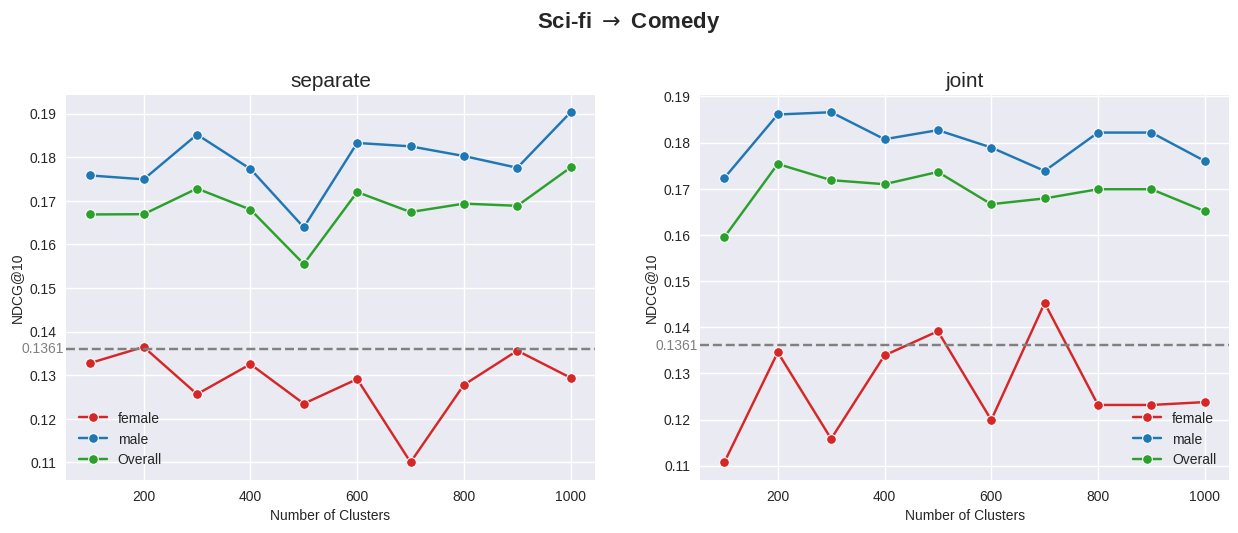

In [18]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
def plot_cluster_mode(file_name,seed, metric):
    plt.style.use("seaborn-v0_8")
    color = sns.color_palette("tab10")
    df = pd.read_csv(file_name,index_col=0)
    df['total_cluster'] = df['cluster_number'].apply(lambda x : x.split(',')[-1] if pd.notnull(x) else x)
    df['total_cluster'] = pd.to_numeric(df['total_cluster'], errors='coerce')
    df.loc[df['cluster_number']=="450,450,800",'total_cluster'] = 900.0
    #calculate the UGF
    df_new = df[["test_Y_MRR_male","test_Y_HR_5_male","test_Y_HR_10_male","test_Y_NDCG_5_male","test_Y_NDCG_10_male"]].subtract(df[["test_Y_MRR_female","test_Y_HR_5_female","test_Y_HR_10_female","test_Y_NDCG_5_female","test_Y_NDCG_10_female"]].values)
    df[["test_Y_MRR_UGF","test_Y_HR_10","test_Y_HR_10","test_Y_NDCG_5_UGF","test_Y_NDCG_10_UGF"]] = df_new
    
    df.rename(columns={"cluster_mode":"cluster mode"},inplace=True)
    metric_name = '@'.join(metric.split('_')[-2:])
    # plot the result of separate cluster mode
    fig, axes = plt.subplots(1,2,figsize=(15,5))
    for mode, i in zip(["separate",'joint'],[0,1]):
        sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])& (df['cluster mode']==mode)], x="total_cluster", y=f"{metric}_female",marker='o',ax=axes[i],label="female",color=color[3])           
        sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline']) & (df['cluster mode']==mode)], x="total_cluster", y=f"{metric}_male", marker='o',ax=axes[i],label="male",color=color[0])
        sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline']) & (df['cluster mode']==mode)], x="total_cluster", y=f"{metric}", marker='o',ax=axes[i],label="Overall",color=color[2])   
        axes[i].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_female"].values[0], color='gray', linestyle='--')
        axes[i].set_title(mode, fontsize=15)
        axes[i].set_xlabel('Number of Clusters')
        axes[i].set_ylabel(metric_name)
        axes[i].legend() 
        # add annotation for baseline value to the plot
        baseline_value = df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_female"].values[0]
        x_lim = axes[i].get_xlim()  # Returns a tuple (x_min, x_max)
        x_pos = x_lim[0]-5 
        axes[i].text(
        x=x_pos,  # Replace with the appropriate x position for your text
        y=baseline_value,
        s=f"{baseline_value:.4f}",
        va='center',
        ha='right',
        color='gray'
        )
        file = file_name.split('/')[-1][:-4].split("_")
        fig.suptitle(rf'{file[0].capitalize()} $\rightarrow$ {file[1].capitalize()}', fontsize=16, fontweight='bold', x=0.5, y=1.05)
    
folder = "cluster_mode_res"
file_list = glob.glob(f"{folder}/*")
for i, file in enumerate(file_list):
    for seed in range(3,8):
        plot_cluster_mode(file,seed, 'test_Y_NDCG_10')
        plt.show()
# folder = "cluster_mode_res_new"
# file_list = glob.glob(f"{folder}/*")
# for i, file in enumerate(file_list):
#     if i==0:
#         plot_seed_result(file,seed, 'test_Y_NDCG_10')
#         plt.show()

# Plot seed result

Seed: 3


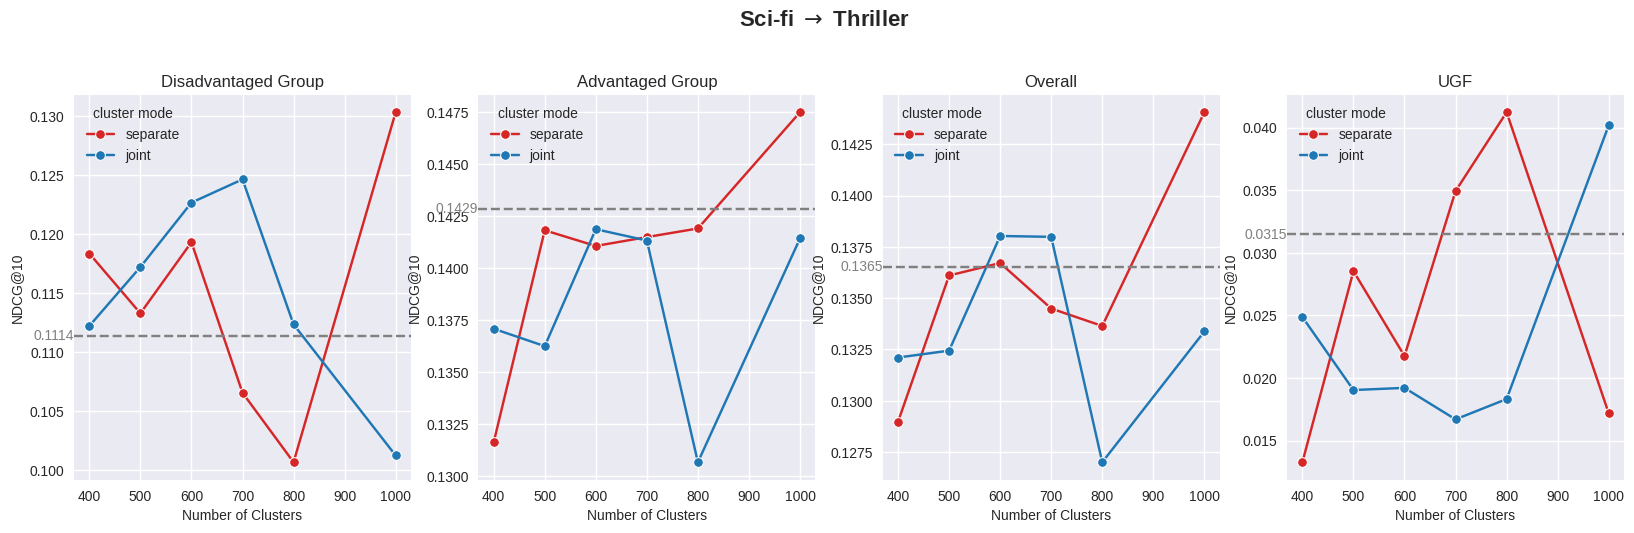

Seed: 4


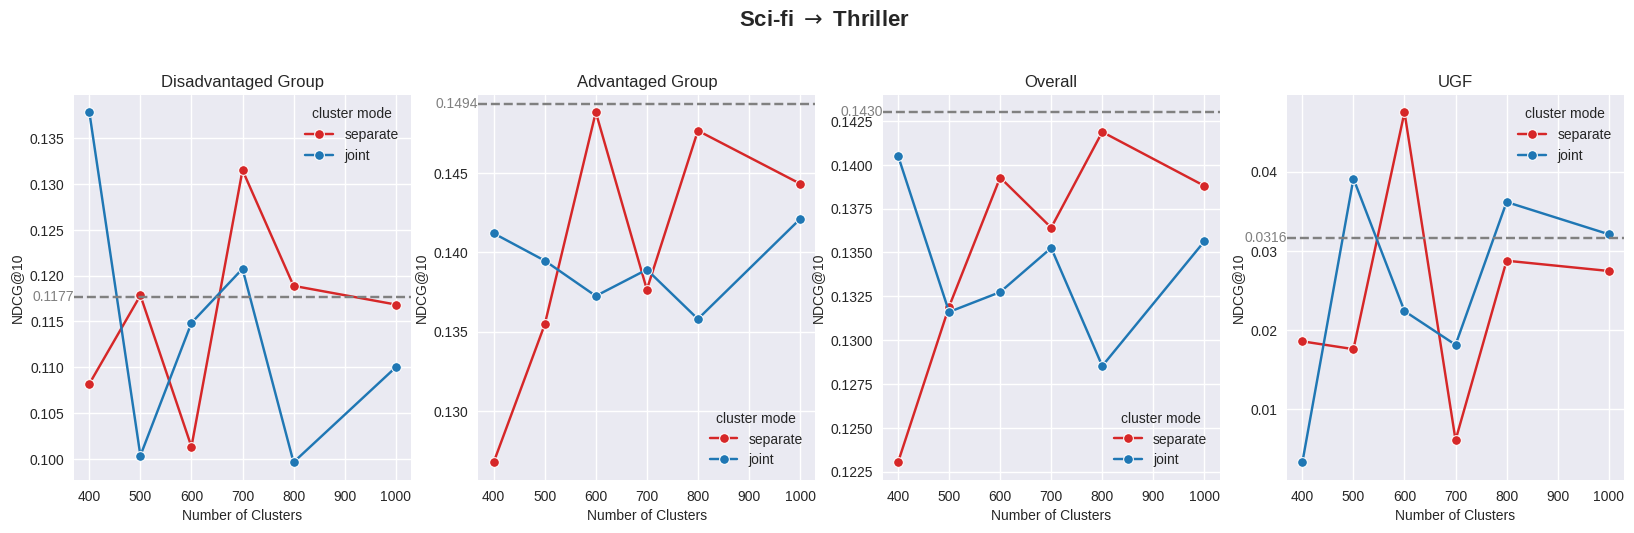

Seed: 5


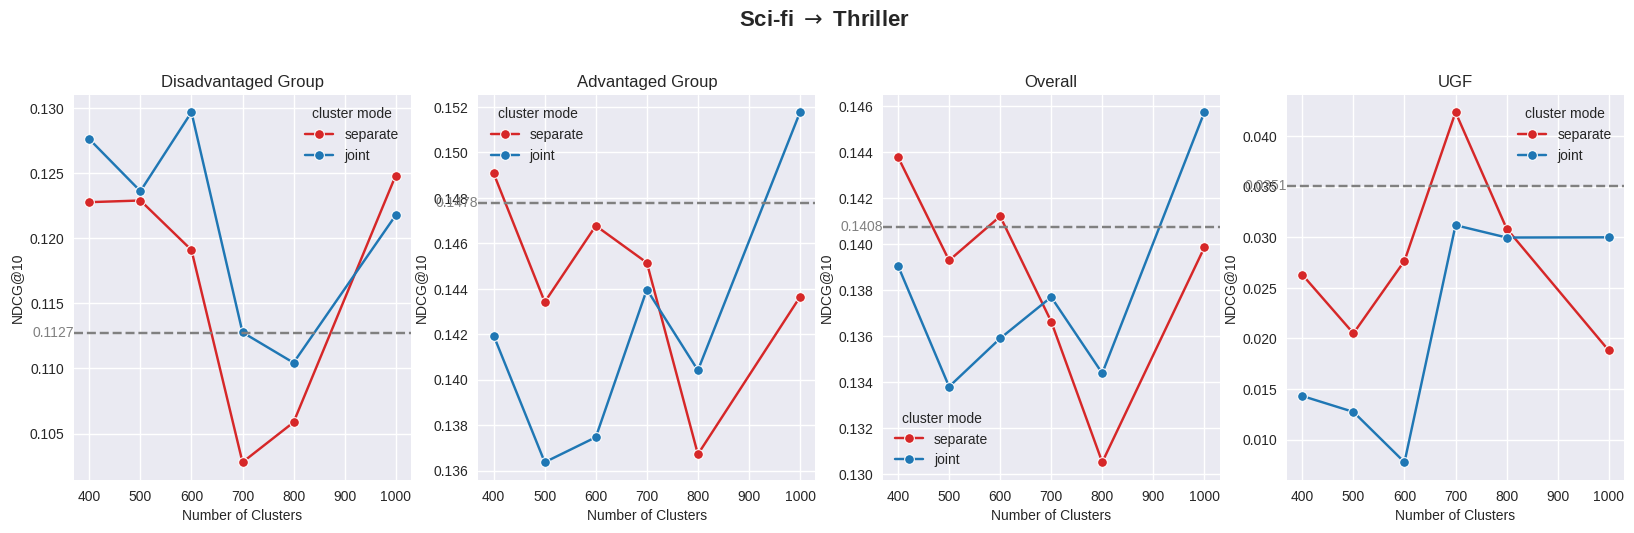

Seed: 6


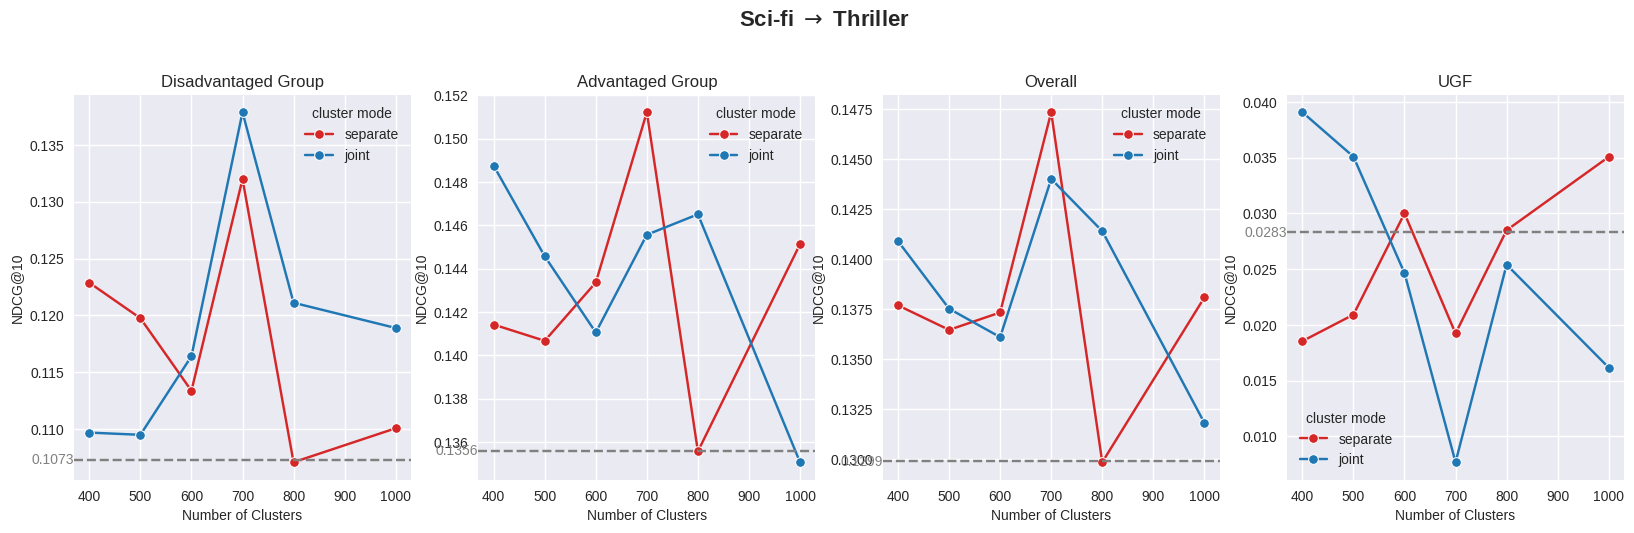

Seed: 7


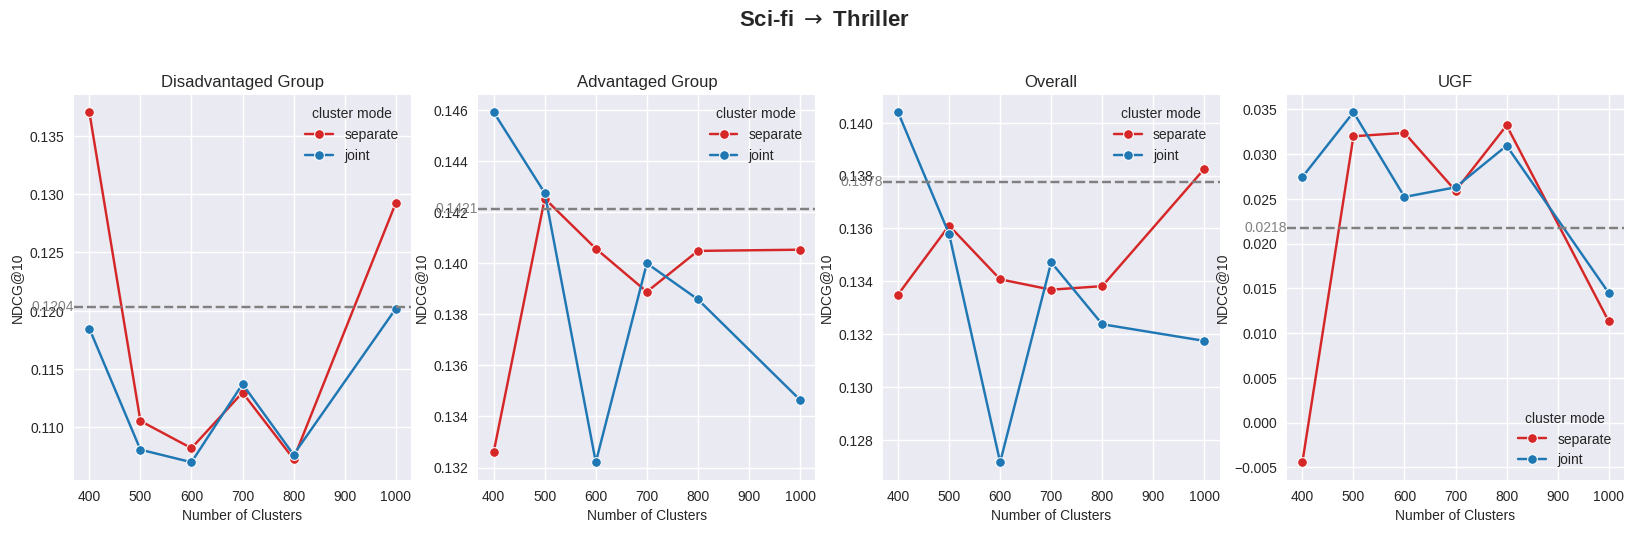

Seed: 3


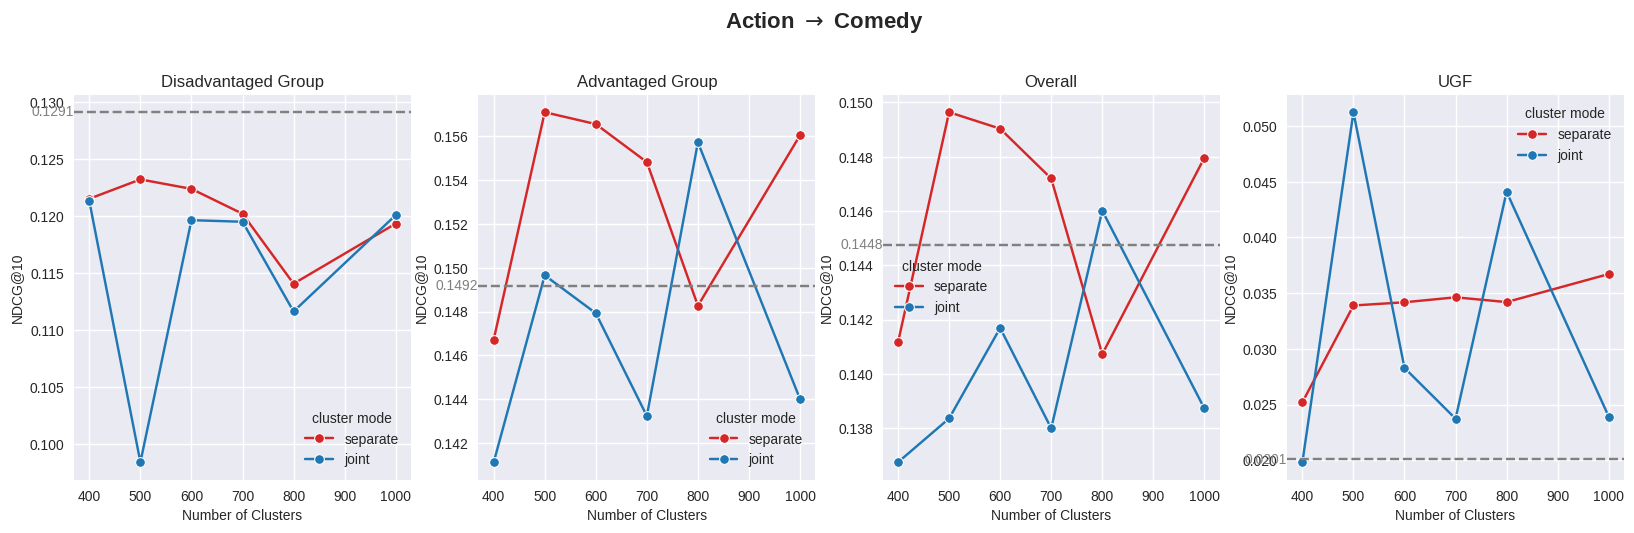

Seed: 4


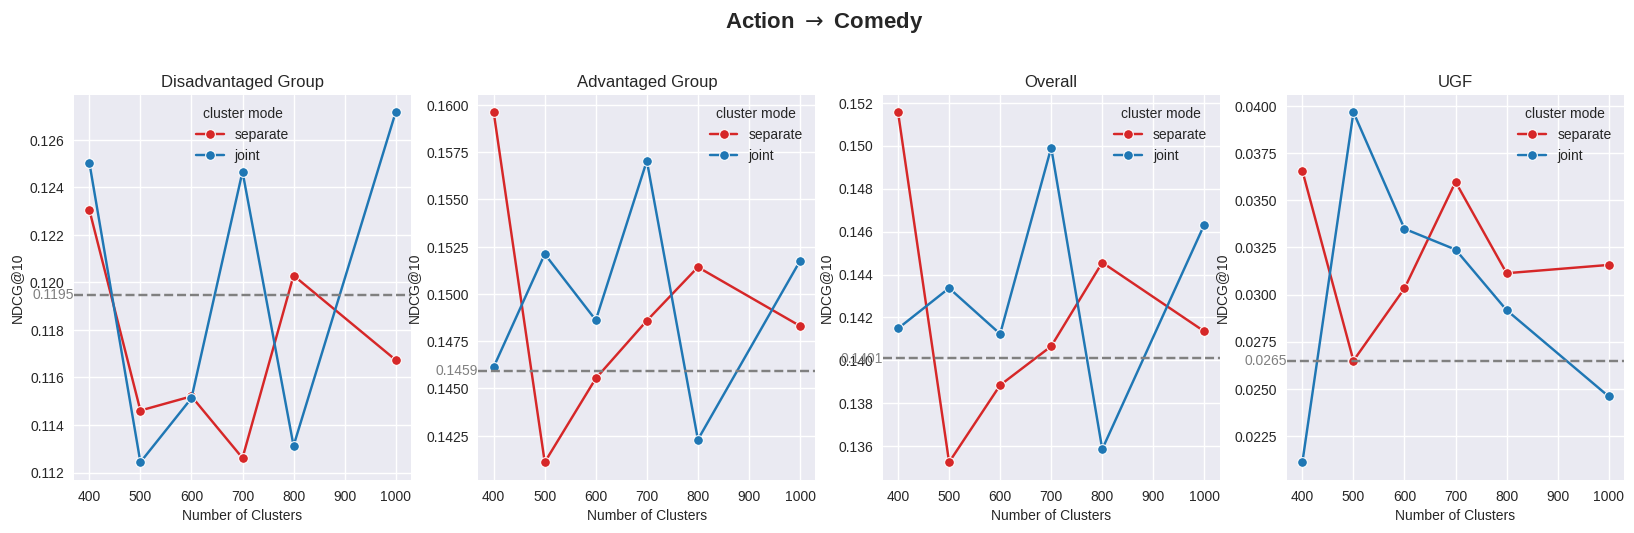

Seed: 5


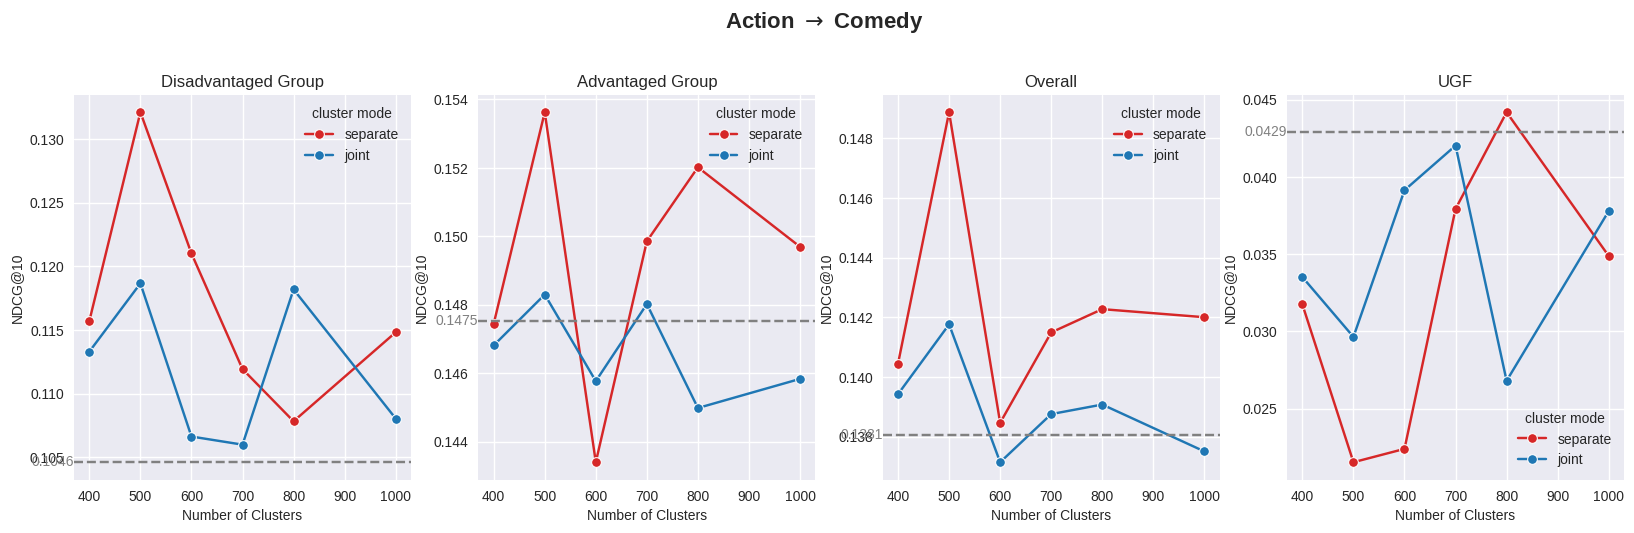

Seed: 6


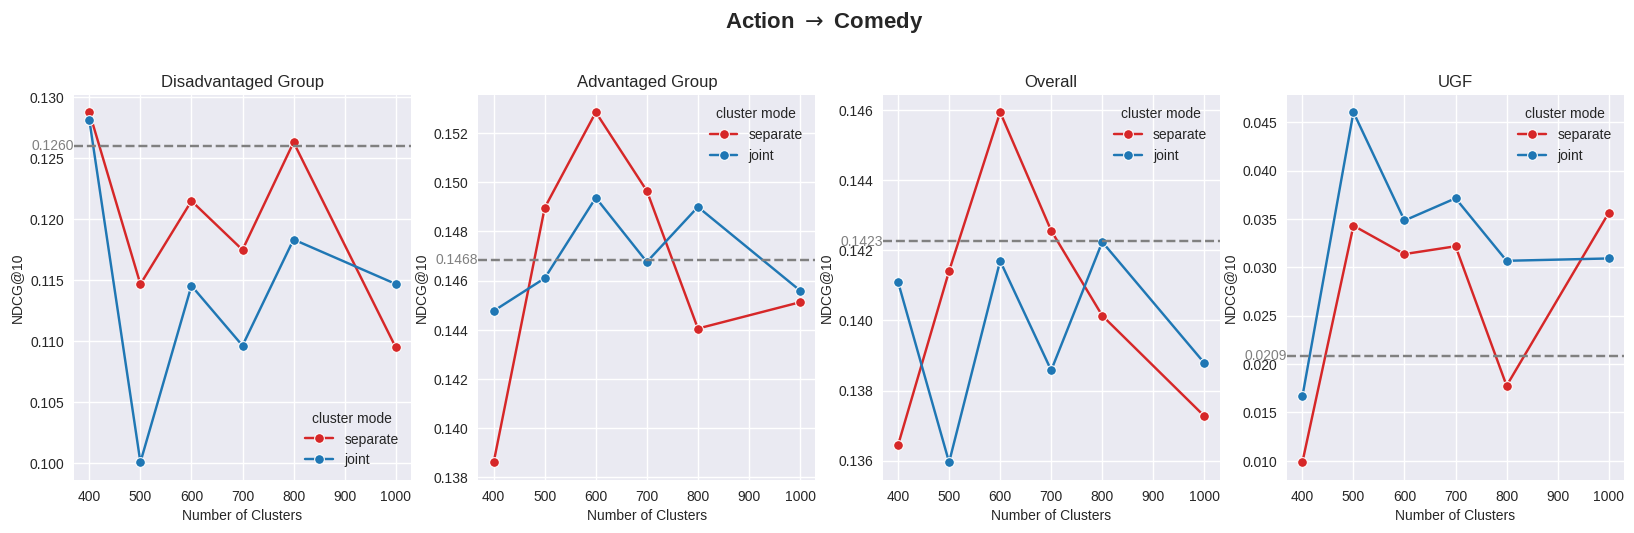

Seed: 7


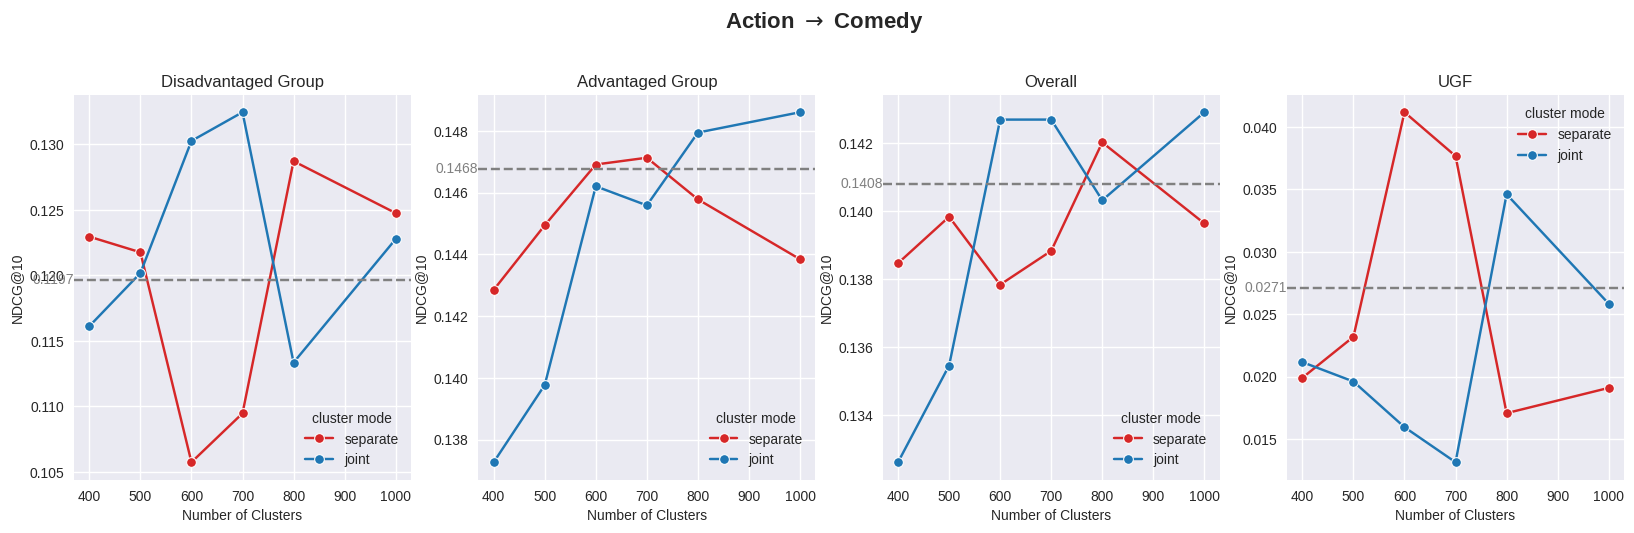

Seed: 3


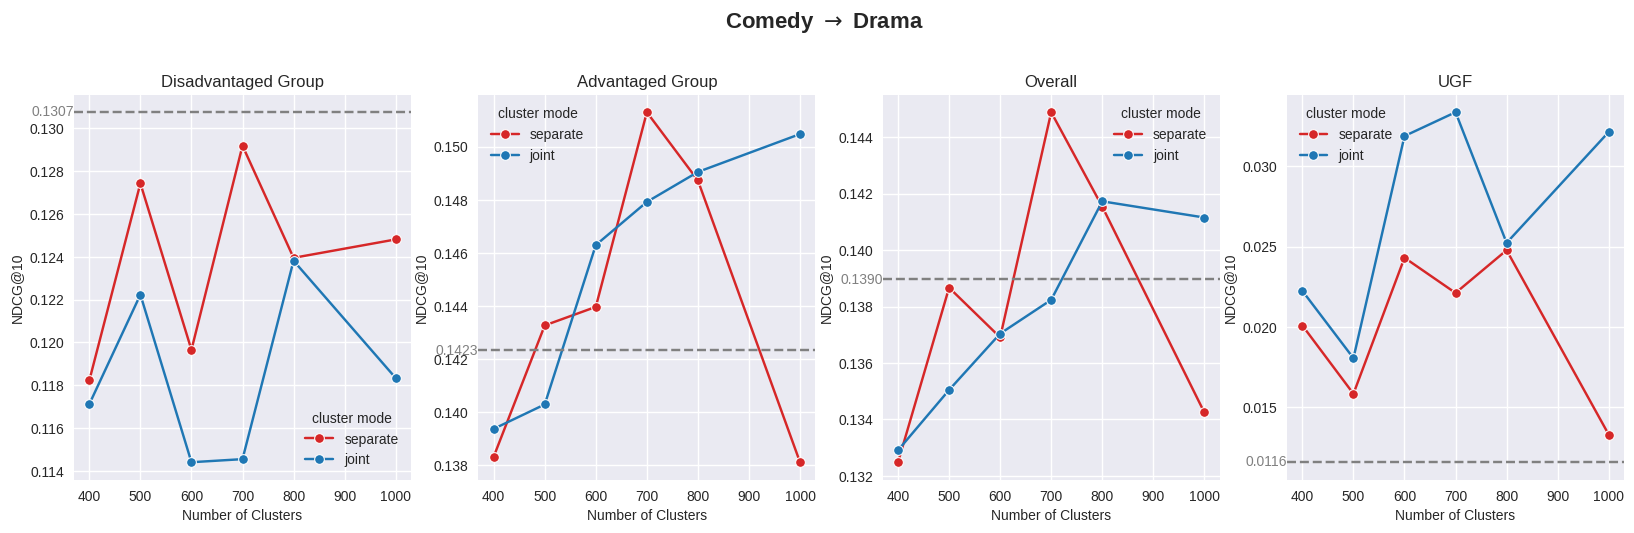

Seed: 4


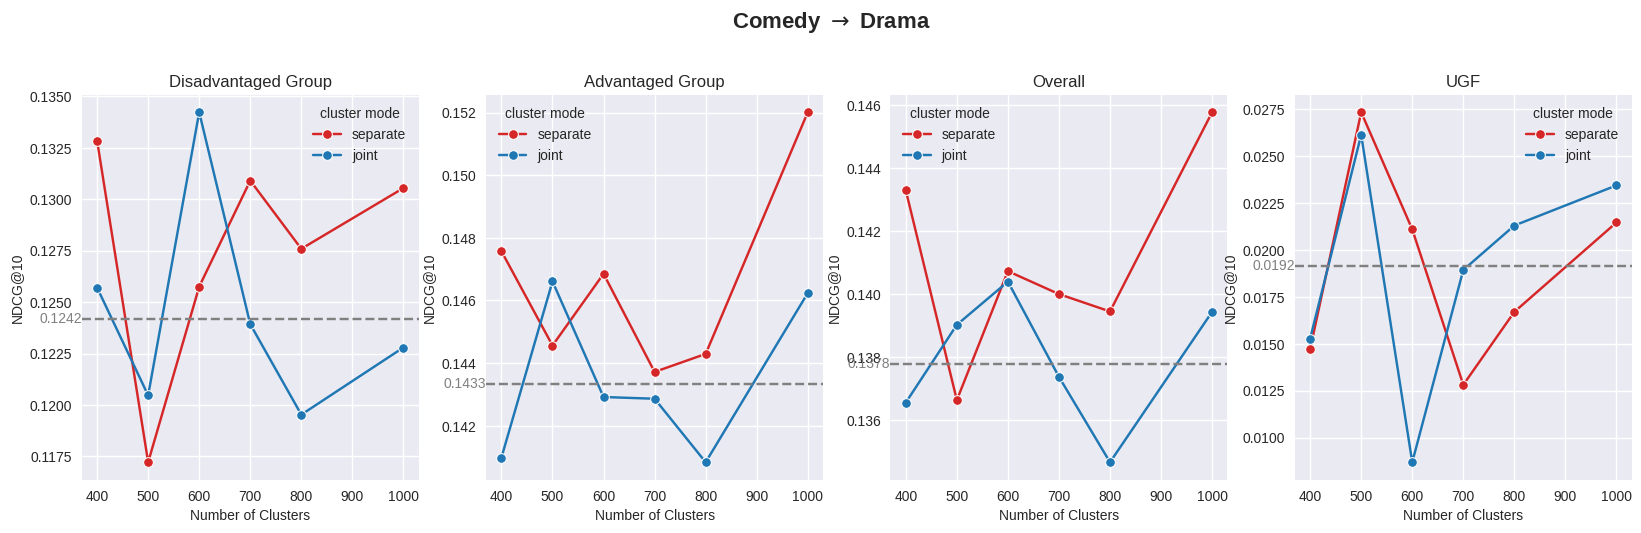

Seed: 5


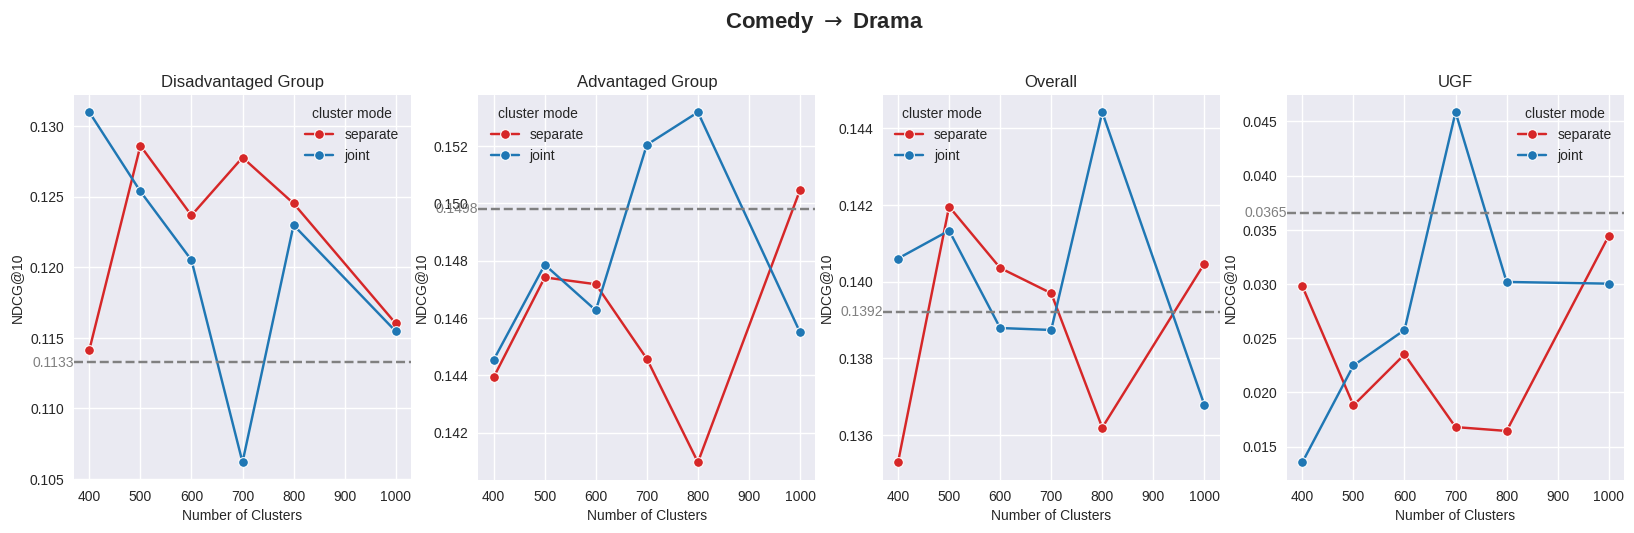

Seed: 6


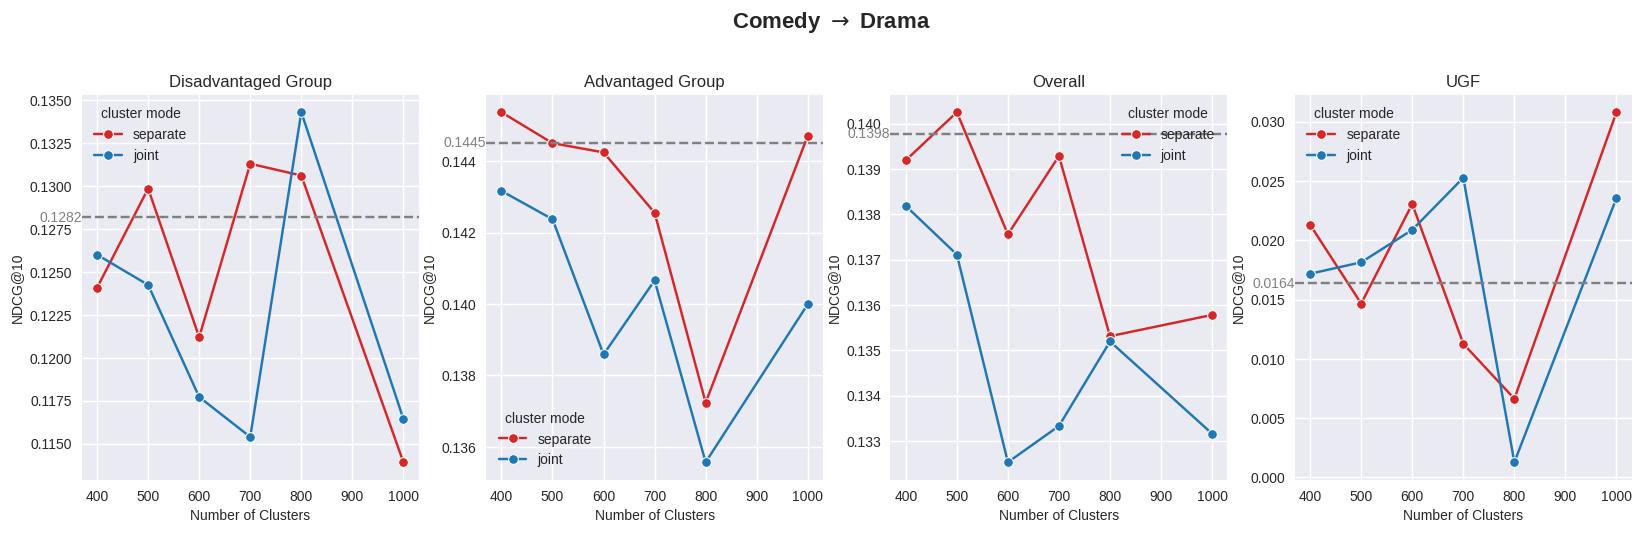

Seed: 7


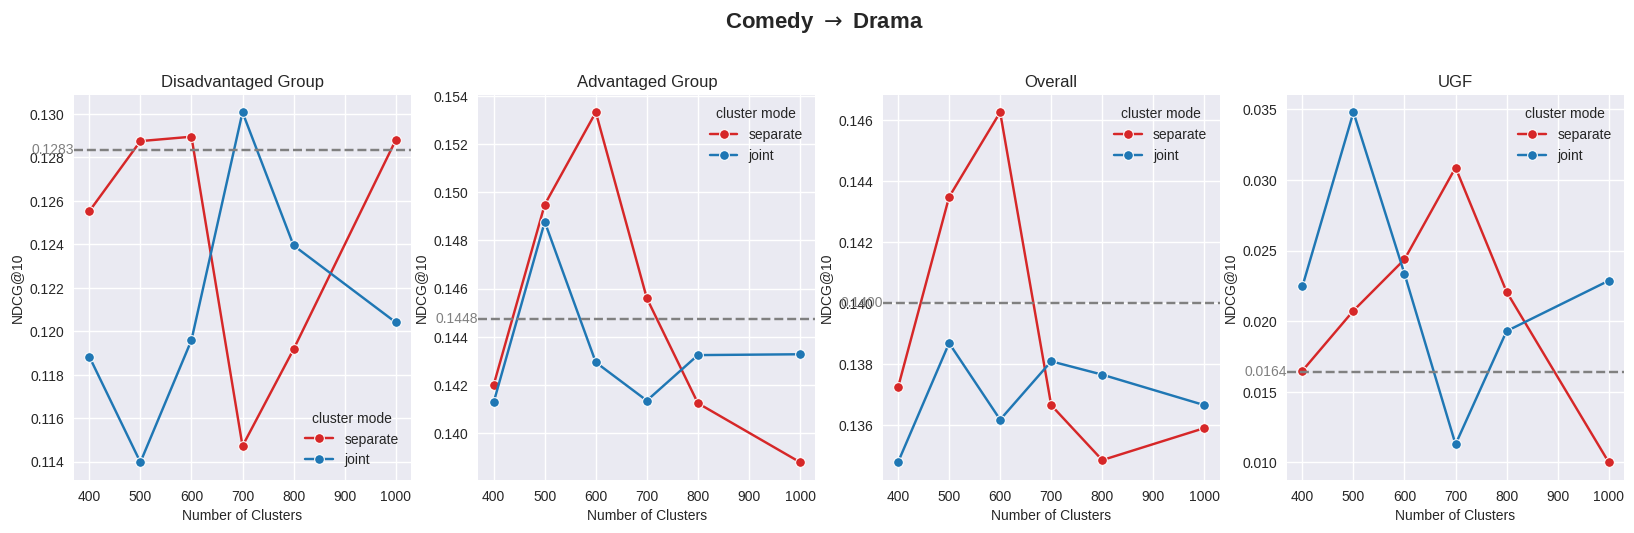

Seed: 3


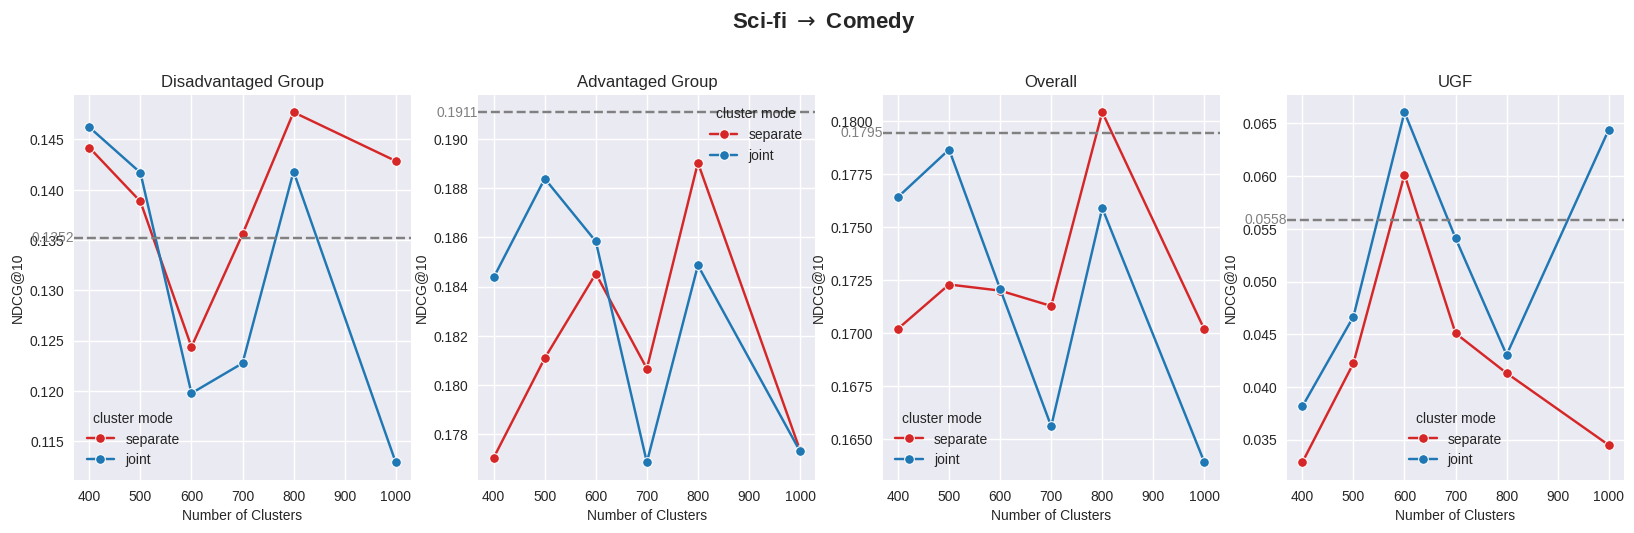

Seed: 4


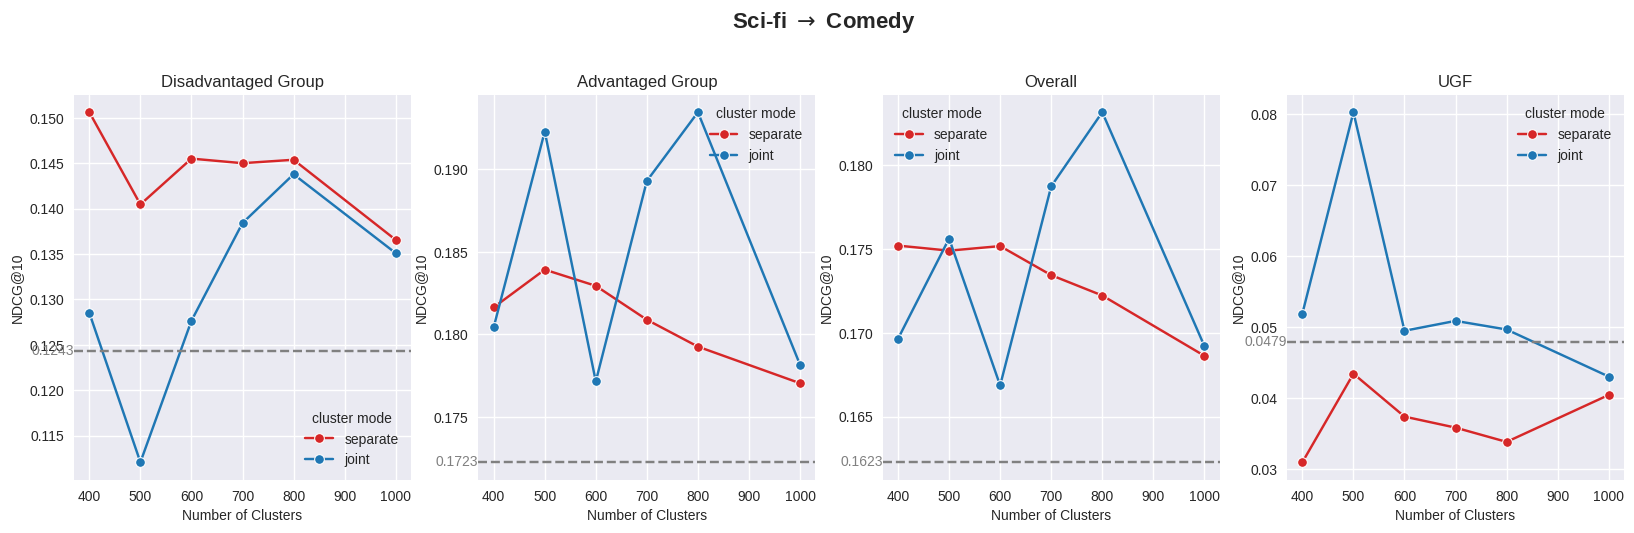

Seed: 5


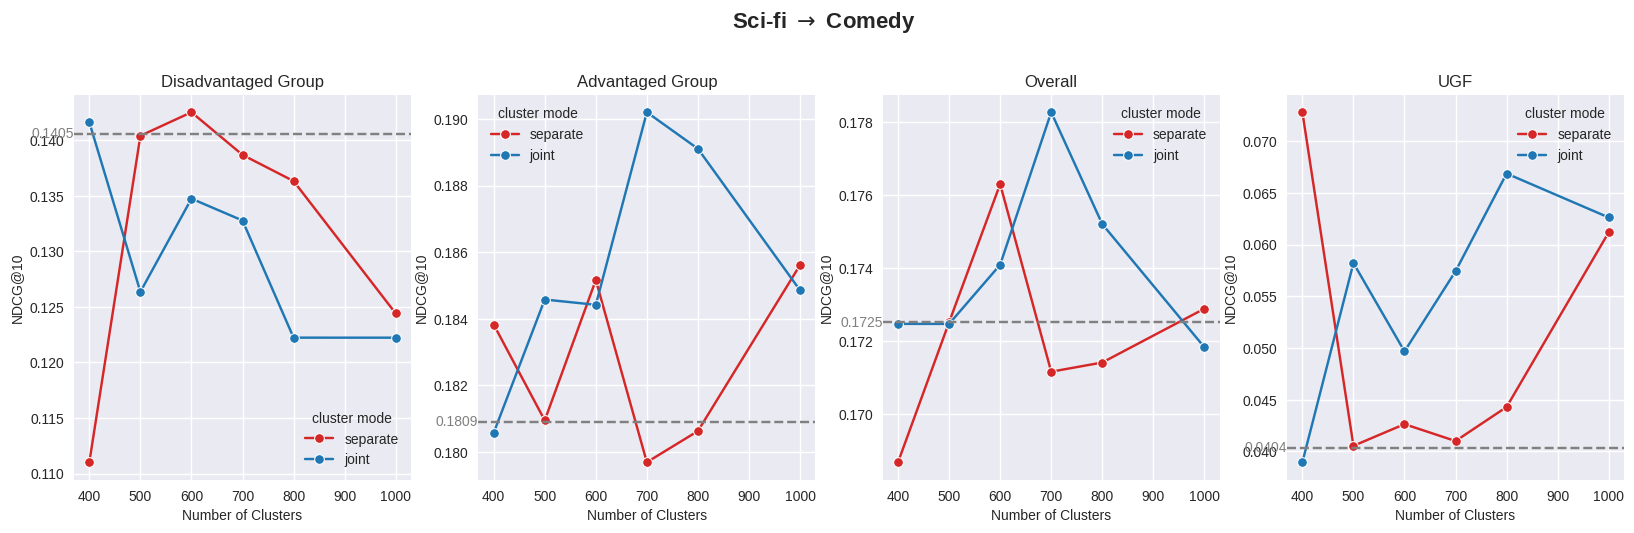

Seed: 6


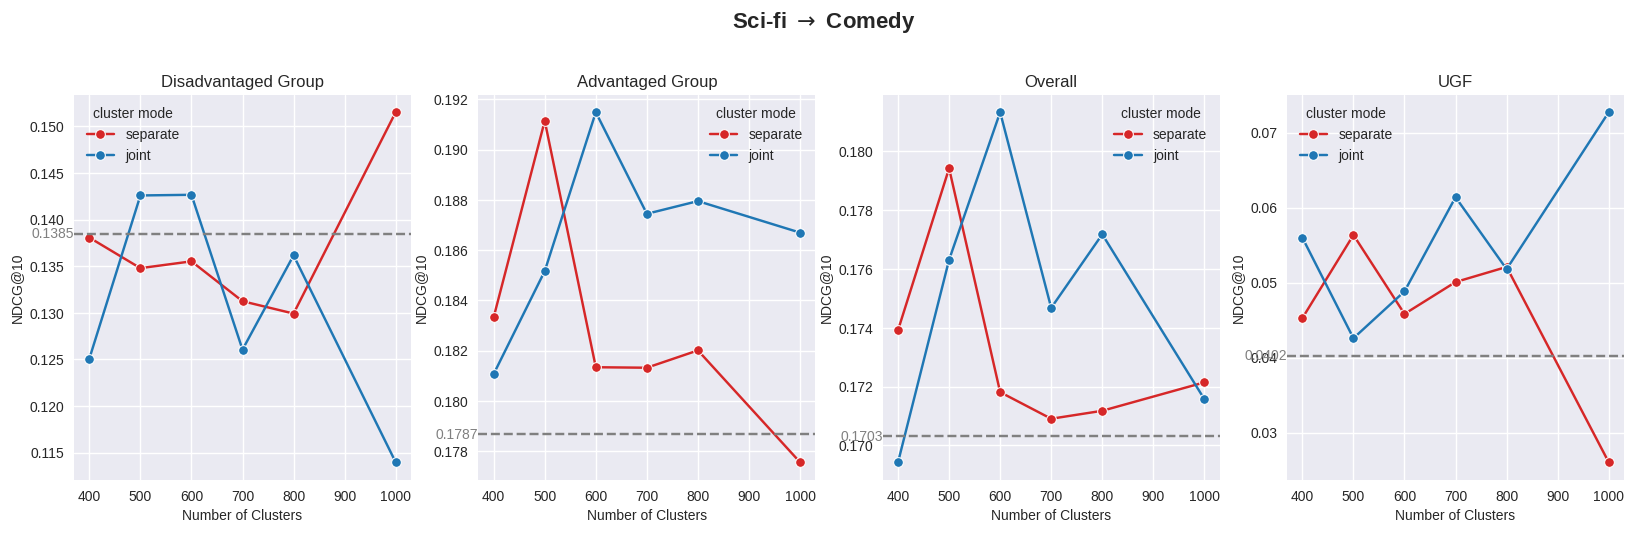

Seed: 7


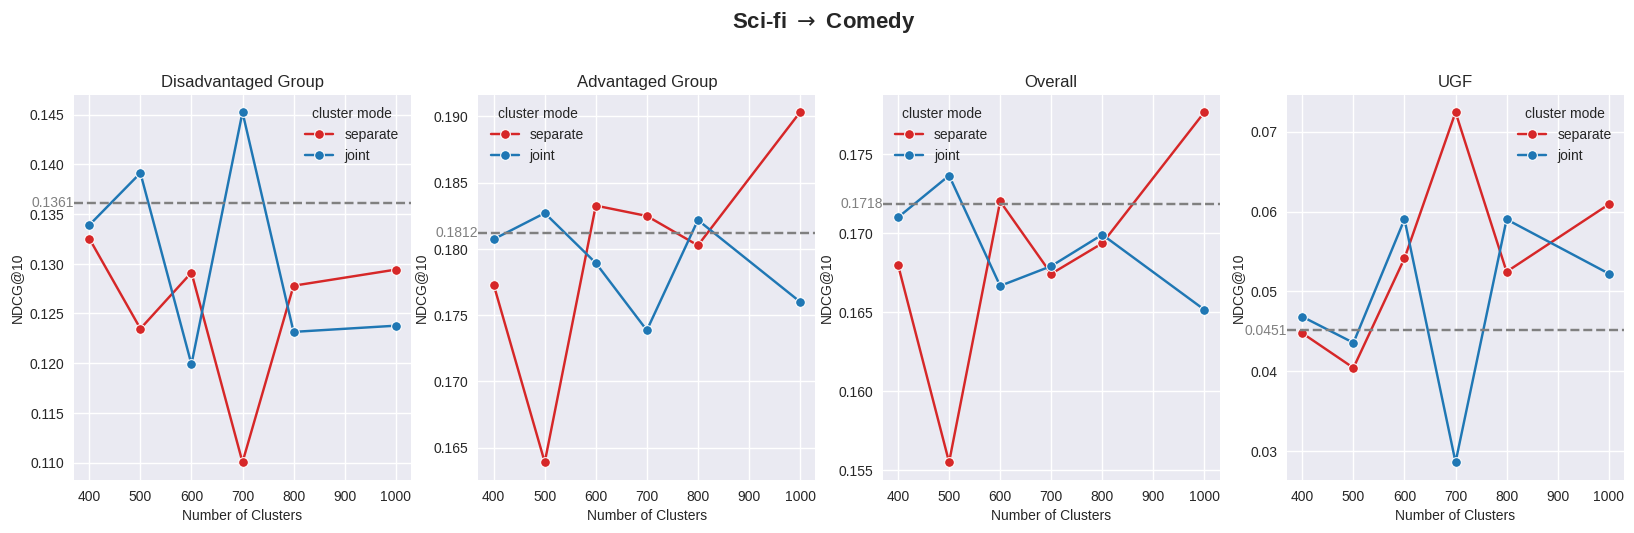

In [15]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
folder = "cluster_mode_res"
file_list = glob.glob(f"{folder}/*")
def plot_seed_result(file_name,seed, metric):
    plt.style.use("seaborn-v0_8")
    color = sns.color_palette("tab10")
    palette = {"separate": color[3], "joint": color[0]}
    df = pd.read_csv(file_name,index_col=0)
    # drop invalid cluster number(450,450,800)
    df.reset_index(drop=True,inplace=True)
    df = df.drop(df[df['cluster_number']=="450,450,800"].index,axis=0)
    # extract the last number of cluster number
    df['total_cluster'] = df['cluster_number'].apply(lambda x : x.split(',')[-1] if pd.notnull(x) else x)
    df['total_cluster'] = df.loc[pd.notnull(df['total_cluster']),'total_cluster'].astype(int)
    df['total_cluster'] = df['total_cluster'].fillna(0)
    #calculate the UGF
    df_new = df[["test_Y_MRR_male","test_Y_HR_5_male","test_Y_HR_10_male","test_Y_NDCG_5_male","test_Y_NDCG_10_male"]].subtract(df[["test_Y_MRR_female","test_Y_HR_5_female","test_Y_HR_10_female","test_Y_NDCG_5_female","test_Y_NDCG_10_female"]].values)
    df[["test_Y_MRR_UGF","test_Y_HR_5_UGF","test_Y_HR_10_UGF","test_Y_NDCG_5_UGF","test_Y_NDCG_10_UGF"]] = df_new
    
    df.rename(columns={"cluster_mode":"cluster mode"},inplace=True)
    # plot the average value of NDCG@10 for each cluster mode under different number of clusters
    fig, axes = plt.subplots(1,4,figsize=(20,5))
    metric_name = '@'.join(metric.split('_')[-2:])
    #get cluster number between 300 and 900
    df = df[((df['total_cluster']<=1000) & (df['total_cluster']>=400))| df['is_baseline']]
    # female
    sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}_female", hue="cluster mode",marker='o',ax=axes[0],palette=palette)           
    axes[0].set_title('Disadvantaged Group')
    axes[0].set_xlabel('Number of Clusters')
    axes[0].set_ylabel(metric_name)
    axes[0].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_female"].values[0], color='gray', linestyle='--')
    baseline_value = df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_female"].values[0]
    x_lim = axes[0].get_xlim()  # Returns a tuple (x_min, x_max)
    x_pos = x_lim[0] 
    axes[0].text(
    x=x_pos,  # Replace with the appropriate x position for your text
    y=baseline_value,
    s=f"{baseline_value:.4f}",
    va='center',
    ha='right',
    color='gray'
    )
    # male
    sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}_male", hue="cluster mode",marker='o',ax=axes[1],palette=palette)              
    axes[1].set_title('Advantaged Group')
    axes[1].set_xlabel('Number of Clusters')
    axes[1].set_ylabel(metric_name)
    axes[1].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_male"].values[0], color='gray', linestyle='--')
    baseline_value = df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_male"].values[0]
    x_lim = axes[1].get_xlim()  # Returns a tuple (x_min, x_max)
    x_pos = x_lim[0] 
    axes[1].text(
    x=x_pos,  # Replace with the appropriate x position for your text
    y=baseline_value,
    s=f"{baseline_value:.4f}",
    va='center',
    ha='right',
    color='gray'
    )
    # Overall
    sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}", hue="cluster mode",marker='o',ax=axes[2],palette=palette)              
    axes[2].set_title('Overall')
    axes[2].set_xlabel('Number of Clusters')
    axes[2].set_ylabel(metric_name)
    axes[2].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}"].values[0], color='gray', linestyle='--')
    baseline_value = df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}"].values[0]
    x_lim = axes[2].get_xlim()  # Returns a tuple (x_min, x_max)
    x_pos = x_lim[0] 
    axes[2].text(
    x=x_pos,  # Replace with the appropriate x position for your text
    y=baseline_value,
    s=f"{baseline_value:.4f}",
    va='center',
    ha='right',
    color='gray'
    )
    # UGF
    sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}_UGF", hue="cluster mode",marker='o',ax=axes[3],palette=palette)
    axes[3].set_title('UGF')
    axes[3].set_xlabel('Number of Clusters')
    axes[3].set_ylabel(metric_name)
    axes[3].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_UGF"].values[0], color='gray', linestyle='--')
    baseline_value = df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_UGF"].values[0]
    x_lim = axes[3].get_xlim()  # Returns a tuple (x_min, x_max)
    x_pos = x_lim[0] 
    axes[3].text(
    x=x_pos,  # Replace with the appropriate x position for your text
    y=baseline_value,
    s=f"{baseline_value:.4f}",
    va='center',
    ha='right',
    color='gray'
    )
    
    file = file_name.split('/')[-1][:-4].split("_")
    fig.suptitle(rf'{file[0].capitalize()} $\rightarrow$ {file[1].capitalize()}', fontsize=16, fontweight='bold', x=0.5, y=1.05)
folder = "cluster_mode_res"
file_list = glob.glob(f"{folder}/*")
for i, file in enumerate(file_list):
    for seed in [3,4,5,6,7]:
        print("Seed:",seed)
        plot_seed_result(file,seed, 'test_Y_NDCG_10')
        plt.show()

# Plot average result

/tmp/ipykernel_1639163/3405010239.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  baseline_df = filtered_df[filtered_df['is_baseline']].groupby("is_baseline").mean().reset_index()


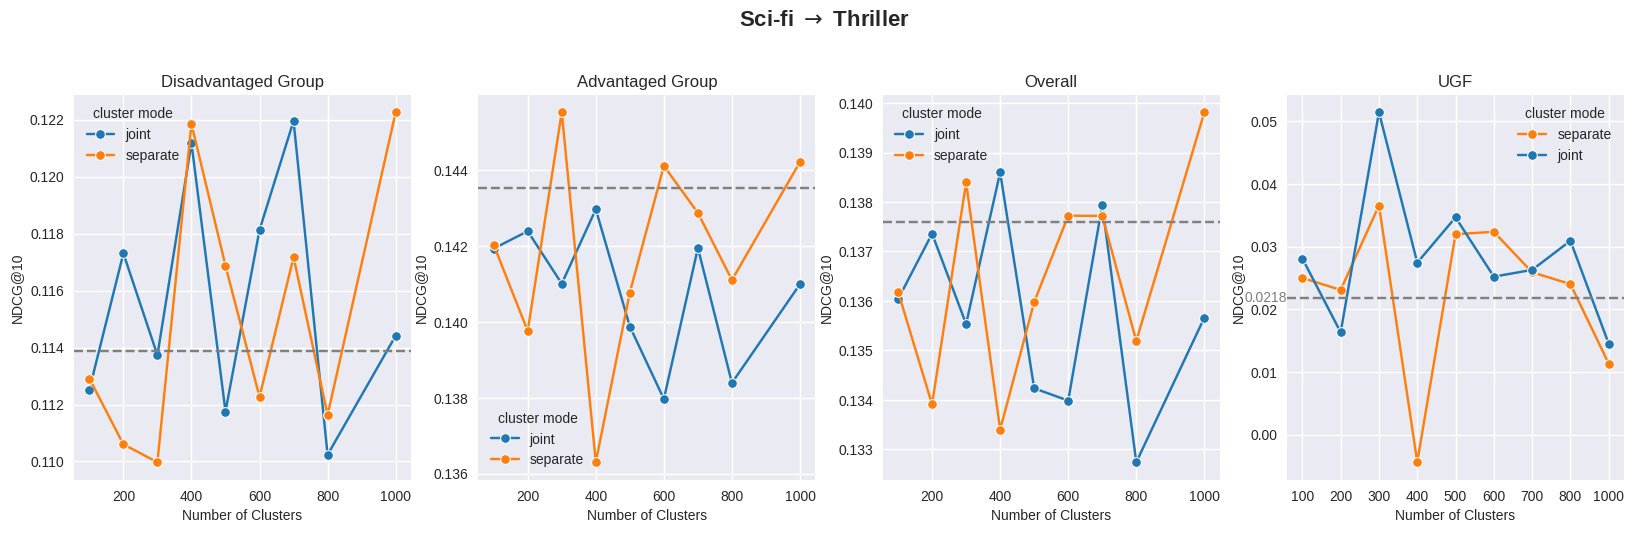

/tmp/ipykernel_1639163/3405010239.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  baseline_df = filtered_df[filtered_df['is_baseline']].groupby("is_baseline").mean().reset_index()


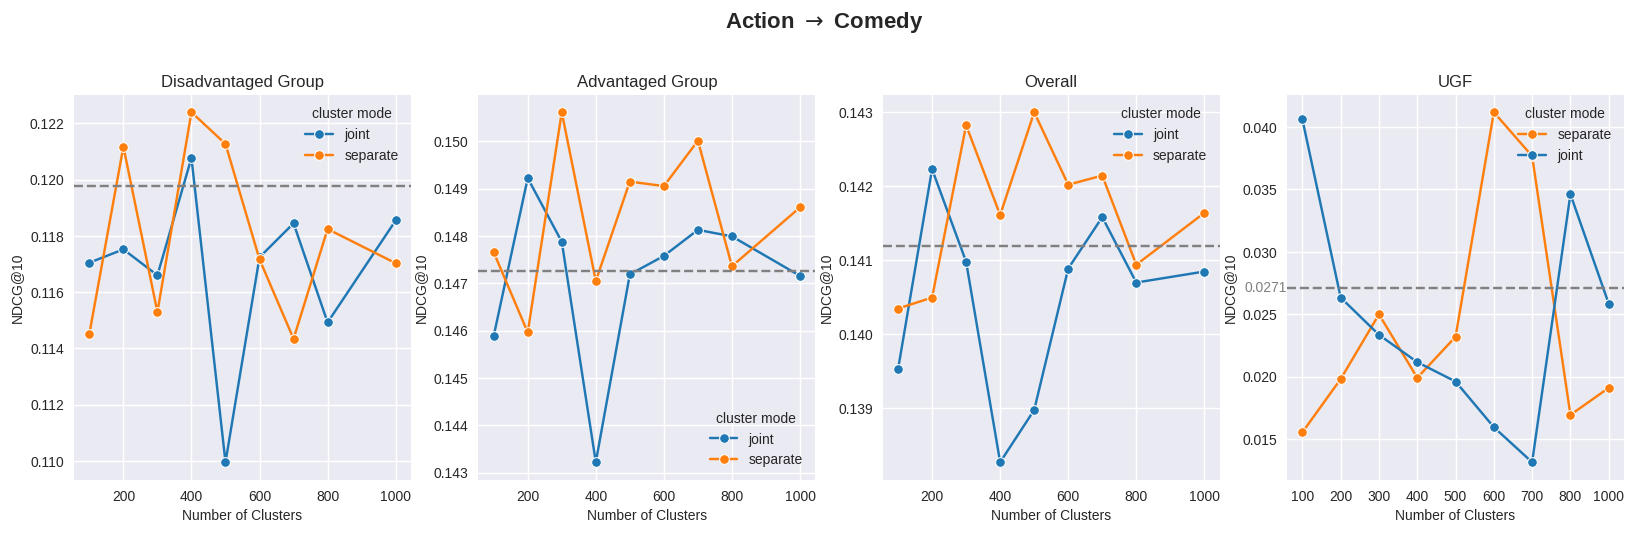

/tmp/ipykernel_1639163/3405010239.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  baseline_df = filtered_df[filtered_df['is_baseline']].groupby("is_baseline").mean().reset_index()


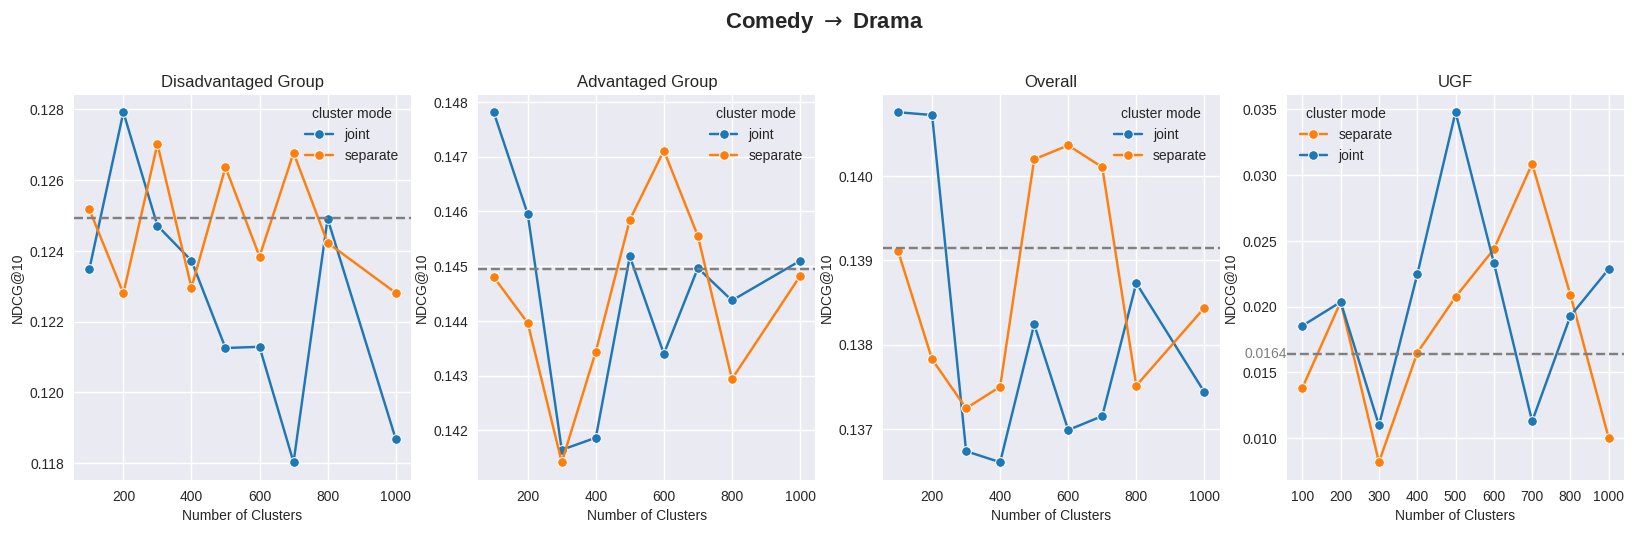

/tmp/ipykernel_1639163/3405010239.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  baseline_df = filtered_df[filtered_df['is_baseline']].groupby("is_baseline").mean().reset_index()


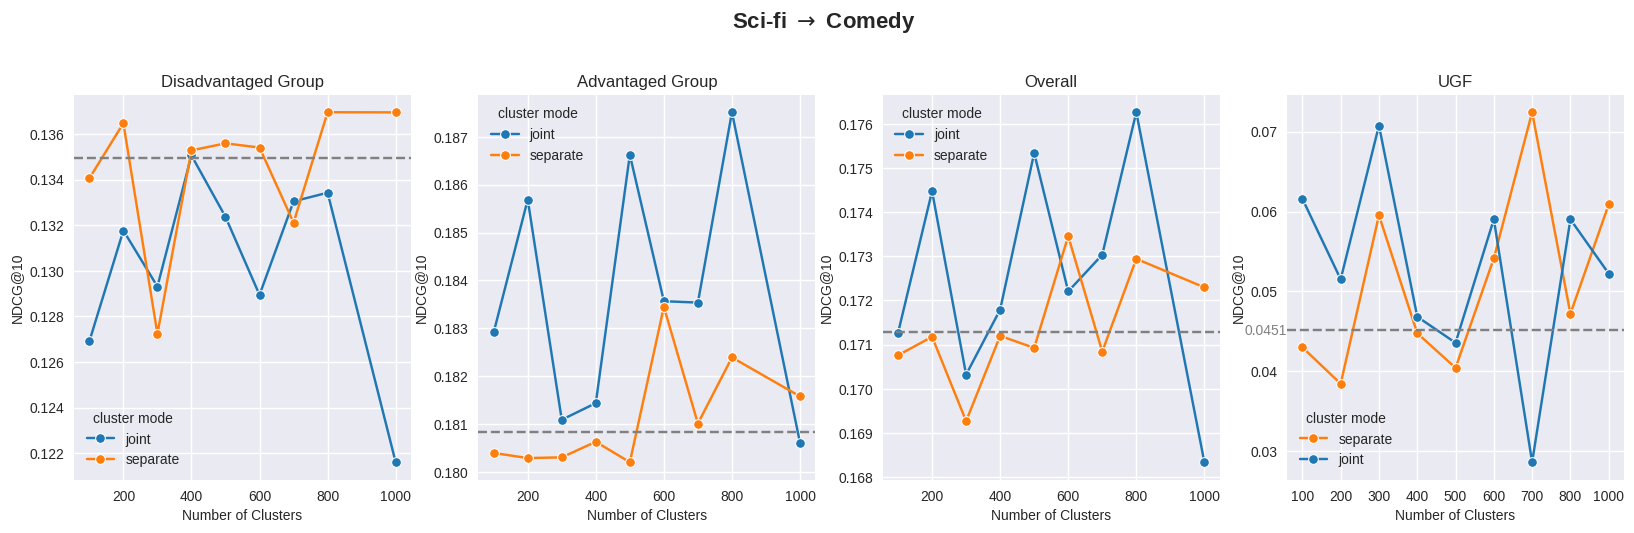

In [49]:
# read in the data
def plot_average_result(file_name, metric):
    plt.style.use("seaborn-v0_8")
    color = sns.color_palette("tab10")
    palette = {"separate": color[1], "joint": color[0]}
    df = pd.read_csv(file_name,index_col=0)
    df['total_cluster'] = df['cluster_number'].apply(lambda x : x.split(',')[-1] if pd.notnull(x) else x)
    df.rename(columns={"cluster_mode":"cluster mode"},inplace=True)
    #calculate the UGF
    df_new = df[["test_Y_MRR_male","test_Y_HR_5_male","test_Y_HR_10_male","test_Y_NDCG_5_male","test_Y_NDCG_10_male"]].subtract(df[["test_Y_MRR_female","test_Y_HR_5_female","test_Y_HR_10_female","test_Y_NDCG_5_female","test_Y_NDCG_10_female"]].values)
    df[["test_Y_MRR_UGF","test_Y_HR_5_UGF","test_Y_HR_10_UGF","test_Y_NDCG_5_UGF","test_Y_NDCG_10_UGF"]] = df_new
    # Group by 'cluster_mode' and 'total_cluster' and calculate the mean
    filtered_df = df[df['seed'].isin(list(range(3,8)))]
    average_df = filtered_df.groupby(['cluster mode', 'total_cluster']).mean(numeric_only=True).reset_index()
    average_df["total_cluster"] = average_df["total_cluster"].astype('int')
    average_df['is_baseline'] = average_df['is_baseline'].astype('bool')
    average_df = average_df.sort_values(by='total_cluster')
    # calculate mean baseline value
    baseline_df = filtered_df[filtered_df['is_baseline']].groupby("is_baseline").mean().reset_index()
    baseline_df['is_baseline'] = baseline_df['is_baseline'].astype('bool')
    average_df = pd.concat([average_df, baseline_df], axis=0)
    fig, axes = plt.subplots(1,4,figsize=(20,5))
    metric_name = '@'.join(metric.split('_')[-2:])
    #female
    sns.lineplot(data=average_df[(average_df['seed']==5) & (~average_df['is_baseline'])], x="total_cluster", y=f"{metric}_female", hue="cluster mode",marker='o',ax=axes[0],palette=palette)           
    axes[0].set_title('Disadvantaged Group')
    axes[0].set_xlabel('Number of Clusters')
    axes[0].set_ylabel(metric_name)
    axes[0].axhline(average_df[(average_df['seed']==5) & (average_df['is_baseline'])][f"{metric}_female"].values[0], color='gray', linestyle='--')
    #male
    sns.lineplot(data=average_df[(average_df['seed']==5) & (~average_df['is_baseline'])], x="total_cluster", y=f"{metric}_male", hue="cluster mode",marker='o',ax=axes[1],palette=palette)              
    axes[1].set_title('Advantaged Group')
    axes[1].set_xlabel('Number of Clusters')
    axes[1].set_ylabel(metric_name)
    axes[1].axhline(average_df[(average_df['seed']==5) & (average_df['is_baseline'])][f"{metric}_male"].values[0], color='gray', linestyle='--')
    #overall
    sns.lineplot(data=average_df[(average_df['seed']==5) & (~average_df['is_baseline'])], x="total_cluster", y=f"{metric}", hue="cluster mode",marker='o',ax=axes[2],palette=palette)              
    axes[2].set_title('Overall')
    axes[2].set_xlabel('Number of Clusters')
    axes[2].set_ylabel(metric_name)
    axes[2].axhline(average_df[(average_df['seed']==5) & (average_df['is_baseline'])][f"{metric}"].values[0], color='gray', linestyle='--')

    # UGF
    sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}_UGF", hue="cluster mode",marker='o',ax=axes[3],palette=palette)
    axes[3].set_title('UGF')
    axes[3].set_xlabel('Number of Clusters')
    axes[3].set_ylabel(metric_name)
    axes[3].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_UGF"].values[0], color='gray', linestyle='--')
    baseline_value = df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_UGF"].values[0]
    x_lim = axes[3].get_xlim()  # Returns a tuple (x_min, x_max)
    x_pos = x_lim[0] 
    axes[3].text(
    x=x_pos,  # Replace with the appropriate x position for your text
    y=baseline_value,
    s=f"{baseline_value:.4f}",
    va='center',
    ha='right',
    color='gray'
    )
    
    file = file_name.split('/')[-1][:-4].split("_")
    fig.suptitle(rf'{file[0].capitalize()} $\rightarrow$ {file[1].capitalize()}', fontsize=16, fontweight='bold', x=0.5, y=1.05)

file_list = glob.glob("cluster_mode_res/*")
for i, file in enumerate(file_list):
    # if i==0:
    plot_average_result(file, 'test_Y_NDCG_10')
    plt.show()



# Table

In [14]:
file_list = glob.glob("cluster_mode_res/*")
df = pd.read_csv(file_list[0],index_col=0)
df['total_cluster'] = df['cluster_number'].apply(lambda x : x.split(',')[-1] if pd.notnull(x) else x)
df.loc[df['cluster_number']=="450,450,800",'total_cluster'] = 900.0
df.groupby()

is_baseline cluster_mode  seed cluster_number  test_Y_MRR  test_Y_NDCG_5  \
0         False     separate     3      50,50,100    0.124694       0.111930   
0         False     separate     3    100,100,200    0.120071       0.107846   
0         False     separate     3    150,150,300    0.128626       0.116370   
0         False     separate     3    200,200,400    0.120275       0.109229   
0         False     separate     3    250,250,500    0.124775       0.112236   
..          ...          ...   ...            ...         ...            ...   
0         False        joint     7    350,350,700    0.124492       0.111749   
0         False        joint     7    400,400,800    0.122800       0.109707   
0         False        joint     7    450,450,800    0.122800       0.109707   
0         False        joint     7   500,500,1000    0.120602       0.105536   
0          True          NaN     7            NaN    0.127516       0.116413   

    test_Y_NDCG_10  test_Y_HR_5  test_Y_HR_10  test_Y_MRR_male  \
0         0.133335     0.217442      0.317442         0.130065   
0         0.129695     0.216279      0.317442         0.125952   
0         0.139301     0.229070      0.337209         0.134240   
0         0.128977     0.220930      0.312791         0.121195   
0         0.136105     0.224419      0.336047         0.131159   
..             ...          ...           ...              ...   
0         0.134718     0.218605      0.326744         0.129349   
0         0.132374     0.218605      0.324419         0.128963   
0         0.132374     0.218605      0.324419         0.128963   
0         0.131742     0.208140      0.330233         0.123513   
0         0.137764     0.232558      0.332558         0.132280   

    test_Y_NDCG_5_male  test_Y_NDCG_10_male  test_Y_HR_5_male  \
0             0.117503             0.138976          0.228419   
0             0.115125             0.137161          0.232784   
0             0.122361             0.145228          0.240058   
0             0.109033             0.131642          0.221145   
0             0.119342             0.141833          0.237148   
..                 ...                  ...               ...   
0             0.117736             0.139995          0.231329   
0             0.115474             0.138584          0.228419   
0             0.115474             0.138584          0.228419   
0             0.108050             0.134651          0.210960   
0             0.121491             0.142139          0.240058   

    test_Y_HR_10_male  test_Y_MRR_female  test_Y_NDCG_5_female  \
0            0.328807           0.103314              0.089748   
0            0.334627           0.096661              0.078869   
0            0.347721           0.106281              0.092522   
0            0.325897           0.116611              0.110011   
0            0.341901           0.099360              0.083947   
..                ...                ...                   ...   
0            0.336081           0.105159              0.087916   
0            0.336081           0.098265              0.086751   
0            0.336081           0.098265              0.086751   
0            0.336081           0.109016              0.095530   
0            0.336081           0.108553              0.096198   

    test_Y_NDCG_10_female  test_Y_HR_5_female  test_Y_HR_10_female  \
0                0.110882            0.173745             0.272201   
0                0.099975            0.150579             0.249035   
0                0.115708            0.185328             0.295367   
0                0.118369            0.220077             0.260618   
0                0.113304            0.173745             0.312741   
..                    ...                 ...                  ...   
0                0.113713            0.167954             0.289575   
0                0.107654            0.179537             0.277992   
0                0.107654            0.179537 